# Description

Data used are from the IBM Watson Repository - Sample Datasets for Customer Retention Programs, where each rows represents the customers, and each columns represents the customer’s attribute. Such as :

- *The target* - The target columns is *'Churn'*. It represents the customers who retained (0) and left within the last month (1).

- *The service types* - Represents what type of services each customer has signed up for, it contained : phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- *The customer account information* - Represents how long the customer's been subscibed to, this contained : contract, payment method, paperless billing, monthly charges, and total charges.

- *The demographic info about customers* - Contains additional info for the customers, such as : gender, senior citizenship status, and whether if they have partners and dependents.

*Coloumns Descriptions :*

- customerID - Customer's ID.

- gender - Customer's gender.

- SeniorCitizen - Whether the customer is a senior citizen or not.

- Partner - Whether the customer has a partner or not.

- Dependents - Whether the customer has dependents or not.

- tenure - How long has the customer subscribed in months.

- PhoneService - Whether the customer has a phone service or not.

- MultipleLines - Whether the customer has multiple lines or not.

- InternetService - Customer’s internet service provider status.

- OnlineSecurity - Whether the customer has online security or not.

- OnlineBackup - Whether the customer has online backup or not.

- DeviceProtection - Whether the customer has device protection or not.

- TechSupport - Whether the customer has tech support or not.

- StreamingTV - Whether the customer has streaming TV or not.

- StreamingMovies - Whether the customer has streaming movies or not.

- Contract - The customer's contract term.

- PaperlessBilling - Whether the customer has paperless billing or not.

- PaymentMethod - The customer’s payment method.

- MonthlyCharges - The amount charged to the customer (monthly).

- TotalCharges - The total amount charged to the customer.

- Churn - Whether the customer churned or not churned.

# Import Libraries

In [1]:
# Importing the Libraries Needed
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek
from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\envs\EnvTensorFlow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Load Dataset

In [2]:
# Load the Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Show the Dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


> Dataframe tersebut memiliki 7043 baris dan 21 kolom

# Quality Checking

In [4]:
# Check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# check values of columns
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values, df[i].dtypes])

data = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values", "type"])
data

,column,null values,unique number,values,type
0,customerID,0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",object
1,gender,0,2,"[Female, Male]",object
2,SeniorCitizen,0,2,"[0, 1]",int64
3,Partner,0,2,"[Yes, No]",object
4,Dependents,0,2,"[No, Yes]",object
5,tenure,0,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",int64
6,PhoneService,0,2,"[No, Yes]",object
7,MultipleLines,0,3,"[No phone service, No, Yes]",object
8,InternetService,0,3,"[DSL, Fiber optic, No]",object
9,OnlineSecurity,0,3,"[No, Yes, No internet service]",object


In [6]:
# Describes the value of the numeric data in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# Describes the value of the categorical data in the dataframe
df.describe(include = "object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
# Categorical Values
categorical = df.select_dtypes("object")
for col in categorical:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Value count column gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count column Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count column Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count column PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count column MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count column InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count column OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: O

# Preprocessing

In [9]:
# check values of columns
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values, df[i].dtypes])

data = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values", "type"])
data

,column,null values,unique number,values,type
0,customerID,0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",object
1,gender,0,2,"[Female, Male]",object
2,SeniorCitizen,0,2,"[0, 1]",int64
3,Partner,0,2,"[Yes, No]",object
4,Dependents,0,2,"[No, Yes]",object
5,tenure,0,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",int64
6,PhoneService,0,2,"[No, Yes]",object
7,MultipleLines,0,3,"[No phone service, No, Yes]",object
8,InternetService,0,3,"[DSL, Fiber optic, No]",object
9,OnlineSecurity,0,3,"[No, Yes, No internet service]",object


> Perlu dilakukan perbaikan jenis data pada kolom totalcharge karena kolom totalcharge merupakan kolom denda uang yang harus dibayarkan. Maka dari itu, kolom tersebut seharusnya adalah float64. Selain itu, SeniorCitizen juga perlu dilakukan replace agar rapih terlebih dahulu.

In [10]:
# Replacre the values
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace = True)

In [11]:
#df["TotalCharges"] = df["TotalCharges"].astype("float64")

> Berdasarkan ValueError diatas, disebutkan terdapat nilai ('') yang menyebabkan tidak bisa digantikannya dengan type float64. Perlu dilakukan pergantian ('') dengan "null" ataupun nilai median/mode.

In [12]:
# Changing the TotalCharges column with coerce
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# Looking the missing values for TotalCharges Column
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


> Terdapat 11 Baris dengan 21 kolom yang dimana pada kolom TotalCharges terdapat missing values karena sebelumnya dilakukan pengubahan data secara paksa

In [14]:
# Filling the missing values with the median of TotalCharges Column 
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
# Describes the value of the numeric data in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


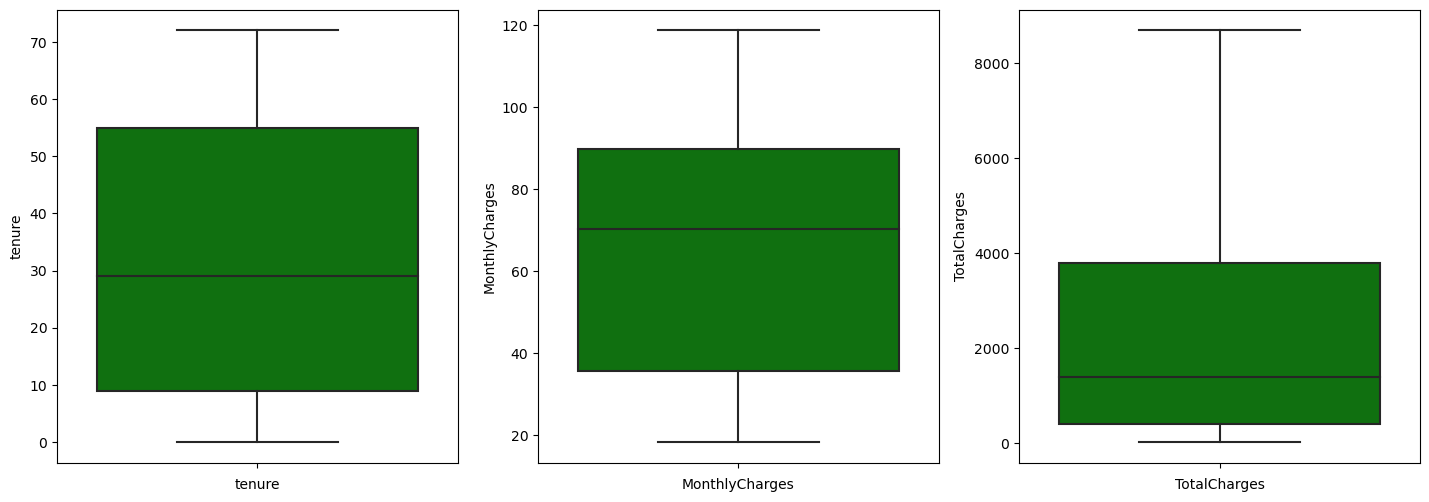

In [16]:
# Looking for outlier in the numerical columns
numerical = df.select_dtypes(include = ["int64","float64"]).columns
numerical
plt.figure(figsize=(30,20))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[numerical[i]], color='green', orient='v')
    plt.xlabel(numerical[i]);

> Pada setiap kolom yang dilakukan cek outlier, dapat dilihat bahwa kolom-kolom tersebut bersih dari outlier

# Exploratory Data Analysis

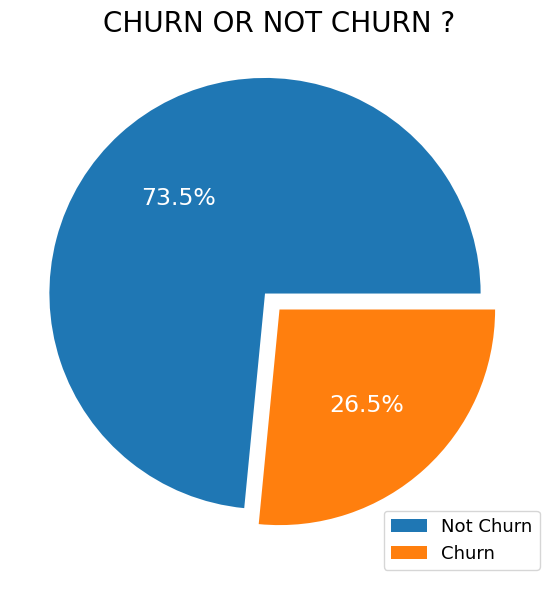

In [17]:
plt.figure(figsize = (8,7))
plt.title('CHURN OR NOT CHURN ?', fontsize = 20)

labels = 'Not Churn', 'Churn'

plt.pie(df['Churn'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [18]:
churn_data = pd.DataFrame()
churn_data["churn"] = df["Churn"].value_counts()

In [19]:
churn_data.T

,No,Yes
churn,5174,1869


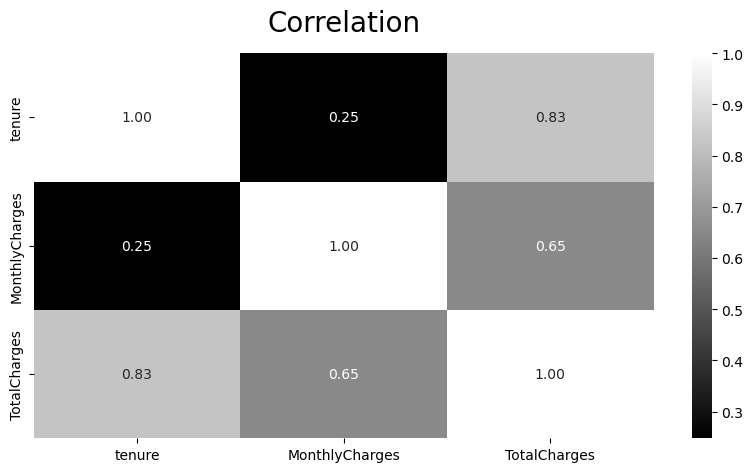

In [20]:
plt.figure(figsize=(10,5))
heatmaps=sns.heatmap(df.corr(),cmap='gray', annot=True, fmt='.2f')
heatmaps.set_title('Correlation', fontdict={'fontsize':20}, pad=16);

## Numerical Data vs Target

In [21]:
# Selecting columns with numerical data tyoe
df.select_dtypes(["int64", "float64"]).columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [22]:
# Create a function to generate boxplots, distribution graphs, and crosstabs from numerical columns
def numerical(kolom):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    # Kolom Age dengan Attrition
    plt.figure(figsize=(6,4))
    sns.distplot(df[kolom][df["Churn"]=="No"], color = "g", label = "No", ax=ax[1])
    sns.distplot(df[kolom][df["Churn"]=="Yes"], color = "r", label = "Yes", ax=ax[1])
    ax[1].legend()
    ax[1].grid()
    
    #boxplot for comparison
    sns.boxplot(x = kolom, y = "Churn", data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + "Churn" + " vs " + kolom)
    
    plt.show()
            
    a = print("Nilai minimum pada kolom", kolom, "adalah", df[kolom].min() )
    b = print("Nilai maksimum pada kolom", kolom, "adalah", df[kolom].max() )
    
    # Melihat detail angka pada grafik tersebut
    data = pd.crosstab(df[kolom],df["Churn"])
    data["yes percentage"] = data["Yes"]/(data["Yes"]+data["No"])
    data["no percentage"] = data["No"]/(data["Yes"]+data["No"])
    
    return data.sort_values(by=["Yes", "yes percentage"], ascending=False)

### tenure

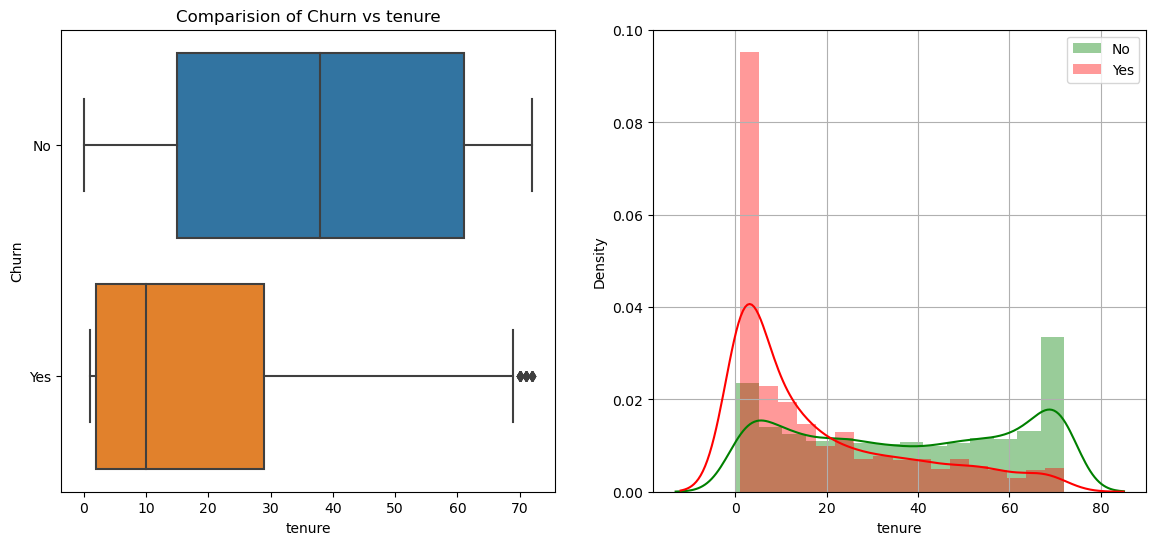

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom tenure adalah 0
Nilai maksimum pada kolom tenure adalah 72


Churn,No,Yes,yes percentage,no percentage
tenure,,,,
1,233,380,0.619902,0.380098
2,115,123,0.516807,0.483193
3,106,94,0.470000,0.530000
4,93,83,0.471591,0.528409
5,69,64,0.481203,0.518797
...,...,...,...,...
72,356,6,0.016575,0.983425
62,65,5,0.071429,0.928571
63,68,4,0.055556,0.944444


In [23]:
numerical("tenure")

> Berdasarkan grafik distribution tersebut, didapatkan bahwa seseorang yang bertahan adalah orang orang yang lebih lama berlangganannya, yaitu lebih dari 40 bulan. Sedangkan seseorang yang meninggalkan adalah pelanggan yang baru berlangganan sebentar, yaitu sekitar 2 bulan.

### MonthlyCharges

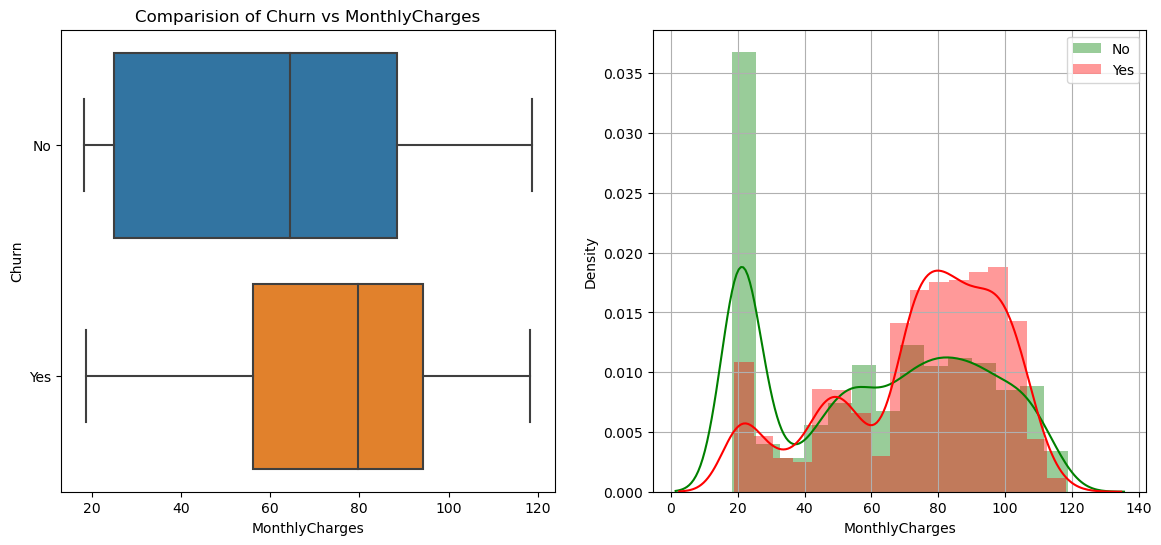

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom MonthlyCharges adalah 18.25
Nilai maksimum pada kolom MonthlyCharges adalah 118.75


Churn,No,Yes,yes percentage,no percentage
MonthlyCharges,,,,
74.40,3,13,0.812500,0.187500
74.90,3,9,0.750000,0.250000
45.30,2,8,0.800000,0.200000
74.95,3,8,0.727273,0.272727
70.00,1,7,0.875000,0.125000
...,...,...,...,...
117.60,1,0,0.000000,1.000000
118.20,1,0,0.000000,1.000000
118.60,2,0,0.000000,1.000000


In [24]:
numerical("MonthlyCharges")

> Pelanggan yang melepaskan berlangganan memiliki rata-rata terkena denda bulanan tinggi, yaitu sekitar 80. Selain itu, pelanggan yang menerima denda bulanan 65 sampai 115 lebih banyak meninggalkan berlangganan daripada tetap bertahan.

### TotalCharges

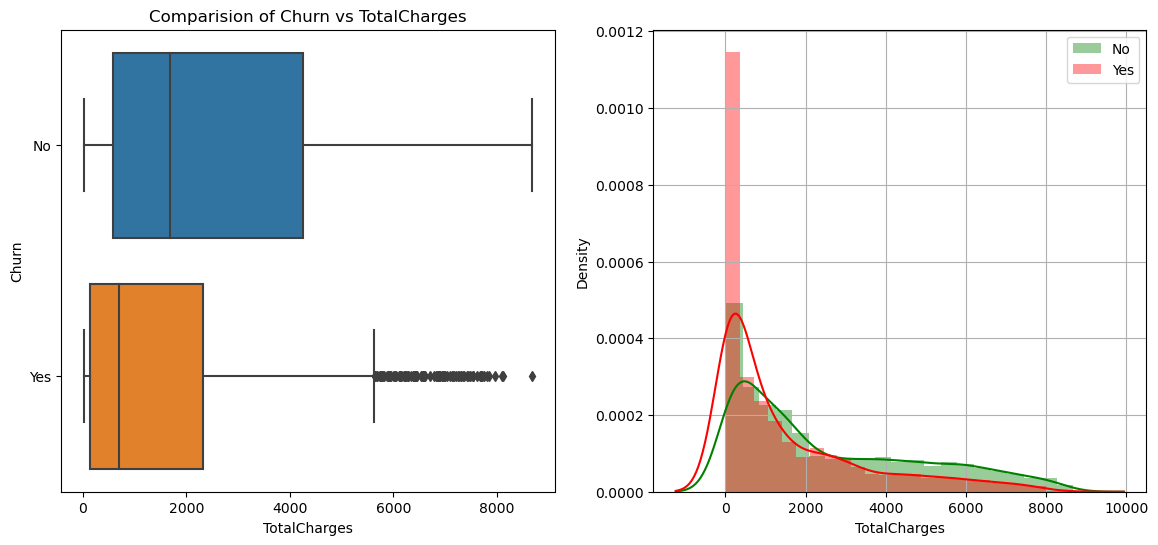

<Figure size 600x400 with 0 Axes>

Nilai minimum pada kolom TotalCharges adalah 18.8
Nilai maksimum pada kolom TotalCharges adalah 8684.8


Churn,No,Yes,yes percentage,no percentage
TotalCharges,,,,
20.20,5,6,0.545455,0.454545
45.30,2,5,0.714286,0.285714
69.60,0,4,1.000000,0.000000
69.65,0,4,1.000000,0.000000
75.30,0,4,1.000000,0.000000
...,...,...,...,...
8547.15,1,0,0.000000,1.000000
8564.75,1,0,0.000000,1.000000
8594.40,1,0,0.000000,1.000000


In [25]:
numerical("TotalCharges")

Berdasarkan grafik dan tabel tersebut, dapat diketahui bahwa 

## Categorical Data vs Target

In [26]:
# Selecting the categorical columns from dataframe
categoric = df.select_dtypes("object").columns

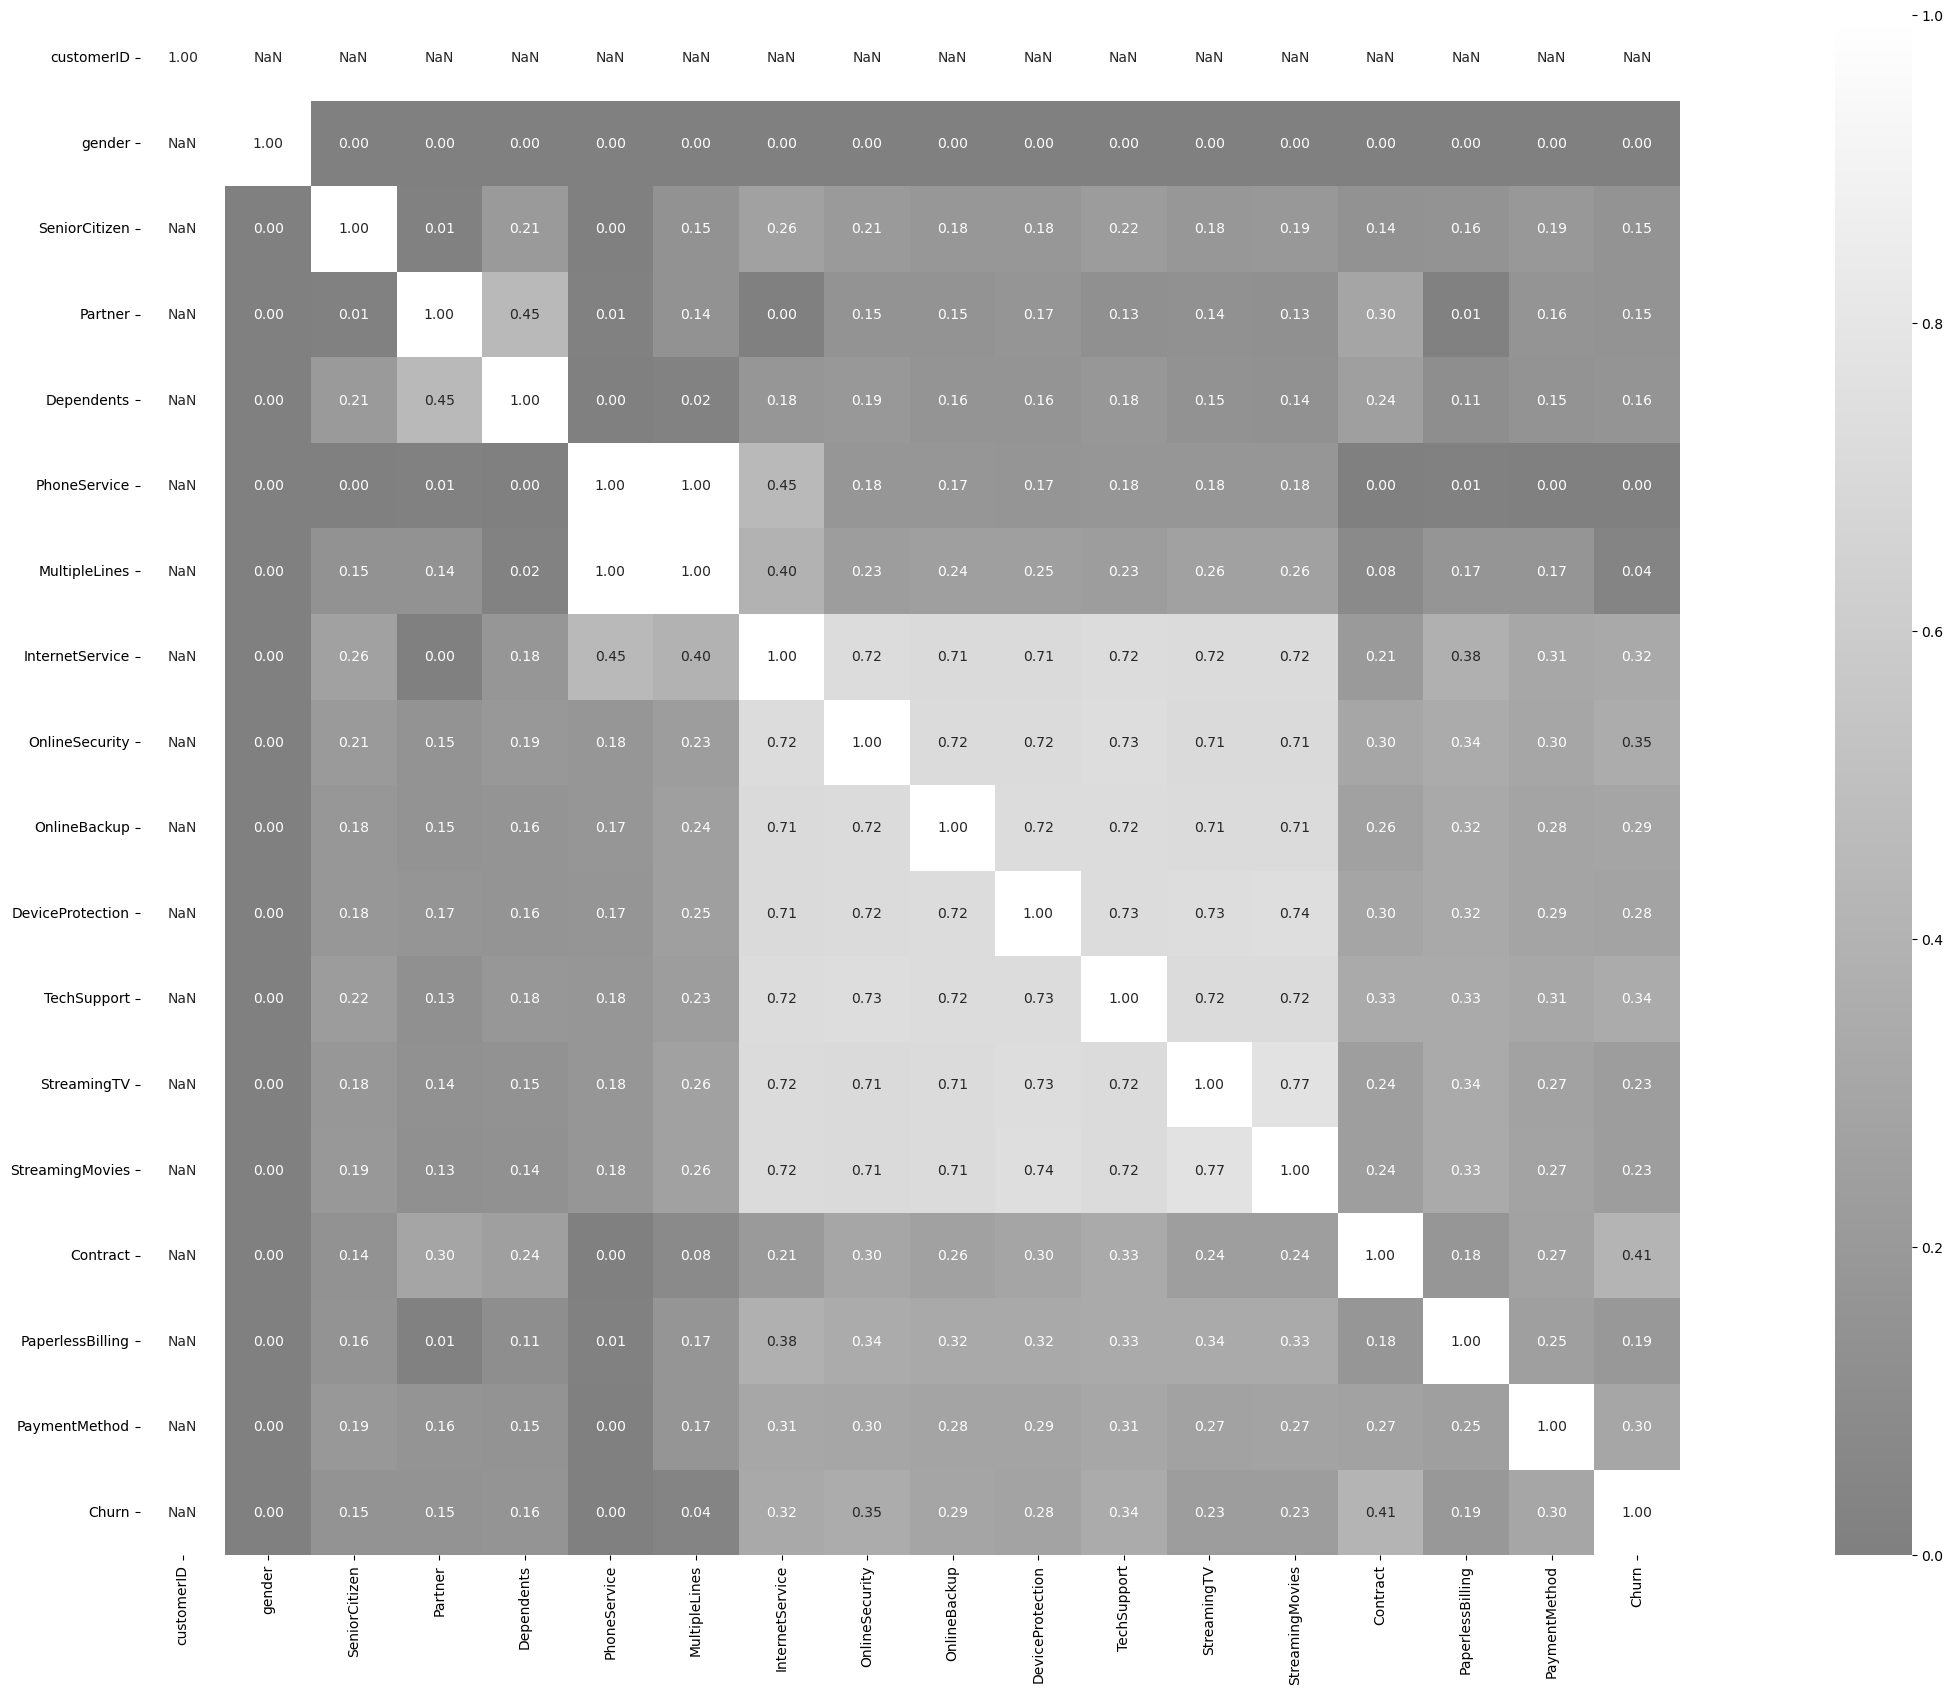

In [27]:
# Make a correlation columns matrix from categorical data
a = associations(df[categoric], annot=True, cmap='gray', figsize=(40,20))

In [28]:
# Create a function to generate boxplots, distribution graphs, and crosstabs from categorical columns
def categorical(column):
    fig, ax = plt.subplots(ncols= 1, figsize = (20,10))
    sns.countplot(x=column, hue="Churn", data=df)
    plt.legend(labels=["No", "Yes"])
    plt.title(column.capitalize() + " vs Churn")
    plt.show()
    # Melihat detail angka pada grafik tersebut
    data = pd.crosstab(df[column],df["Churn"])
    data["yes percentage"] = data["Yes"]/(data["Yes"]+data["No"])
    data["no percentage"] = data["No"]/(data["Yes"]+data["No"])
    # menghitung persentase orang yang memiliki "kolom" berbeda
    data["percentage of "+ column] = round(df[column].value_counts()/df.shape[0] * 100,2)
    return data.sort_values(by=["Yes", "yes percentage"], ascending = False)

### Gender

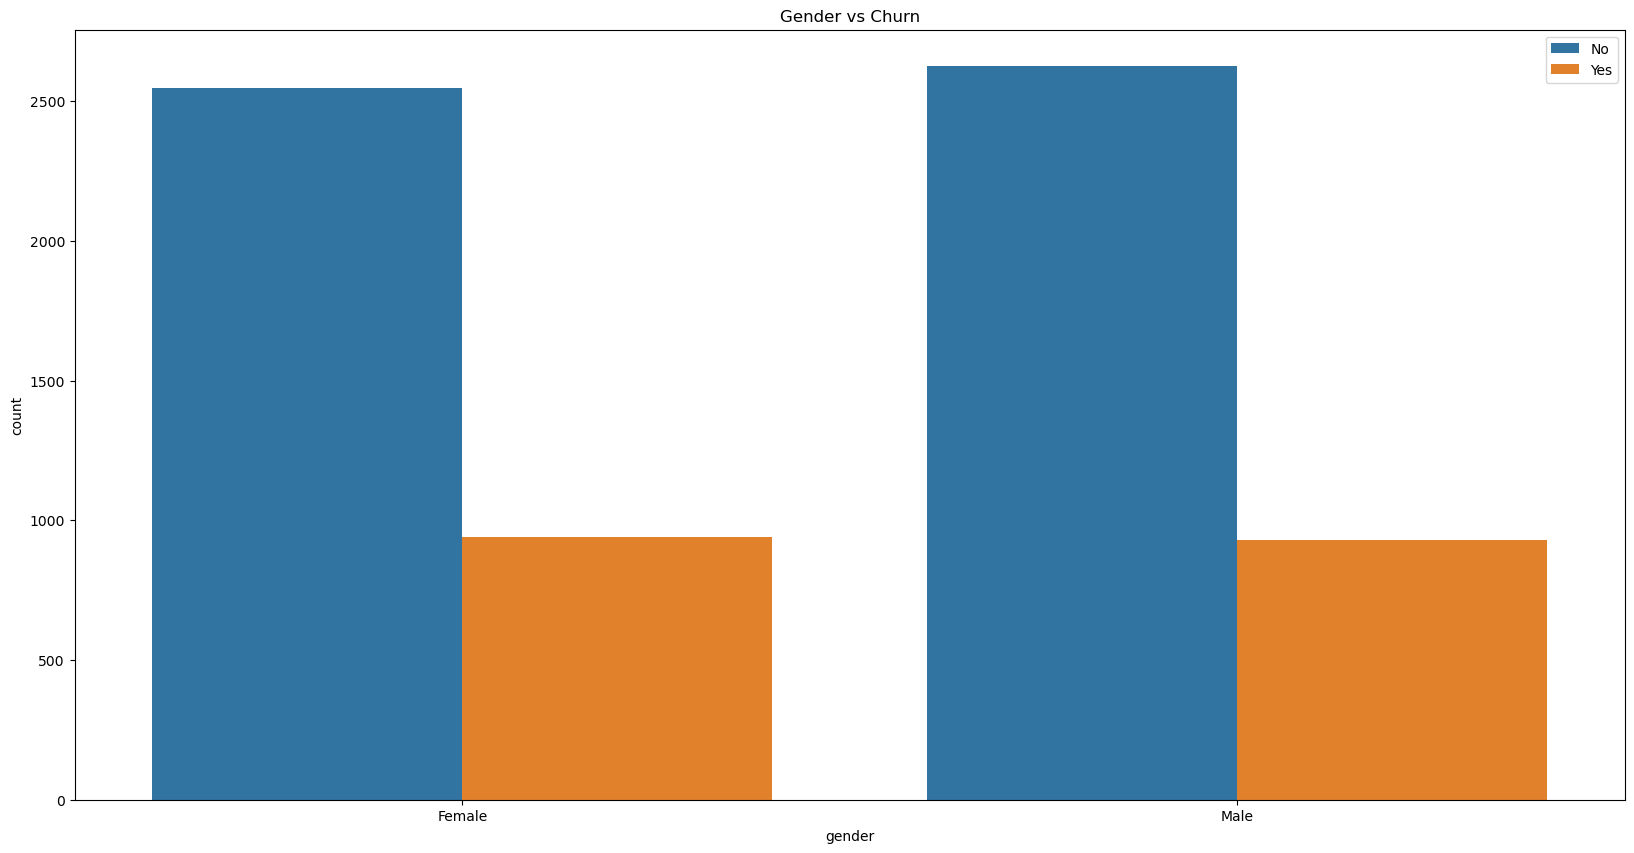

Churn,No,Yes,yes percentage,no percentage,percentage of gender
gender,,,,,
Female,2549,939,0.269209,0.730791,49.52
Male,2625,930,0.261603,0.738397,50.48


In [29]:
# Gender to Churn
categorical("gender")

> Pada diagram tersebut dapat terlihat bahwa tidak terlihat perbedaan yang signifikan antara pengaruh dari gender terhadap keputusan seseorang untuk bertahan ataupun berhenti berlangganan. Pada tabel Crosstab juga dapat dilihat bahwa keduanya memiliki angka yang tidak jauh berbeda.

### SeniorCitizen

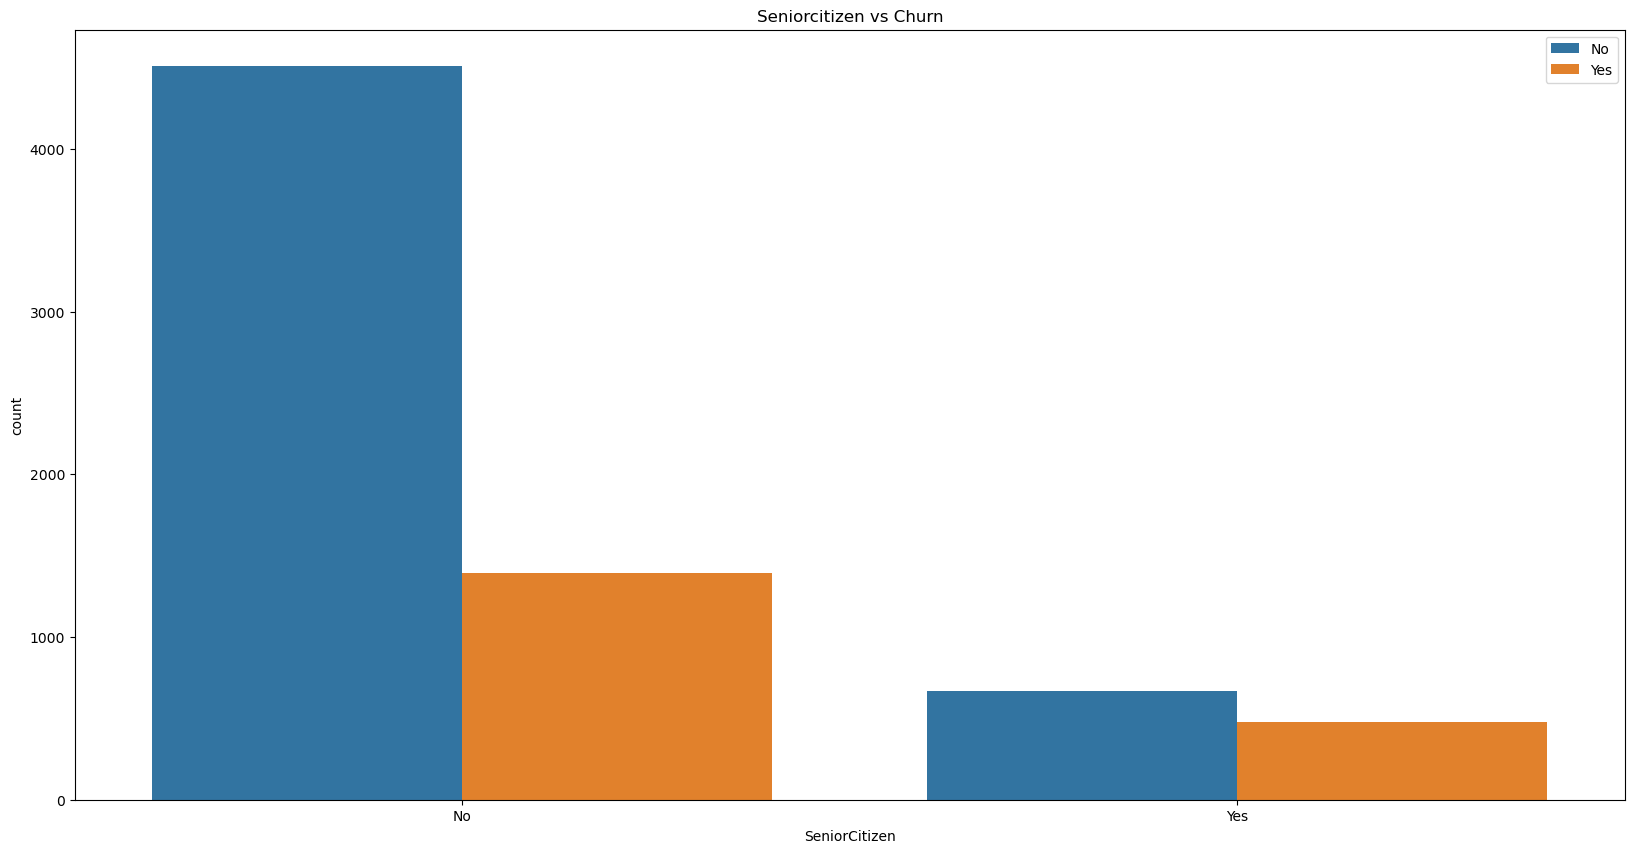

Churn,No,Yes,yes percentage,no percentage,percentage of SeniorCitizen
SeniorCitizen,,,,,
No,4508,1393,0.236062,0.763938,83.79
Yes,666,476,0.416813,0.583187,16.21


In [30]:
categorical("SeniorCitizen")

> Senior Citizens have almost double the churn rate than younger yes percentage.  

> The most subscribed customers are those who are still young. This is shown in the proportion of 83.79%

### Partner

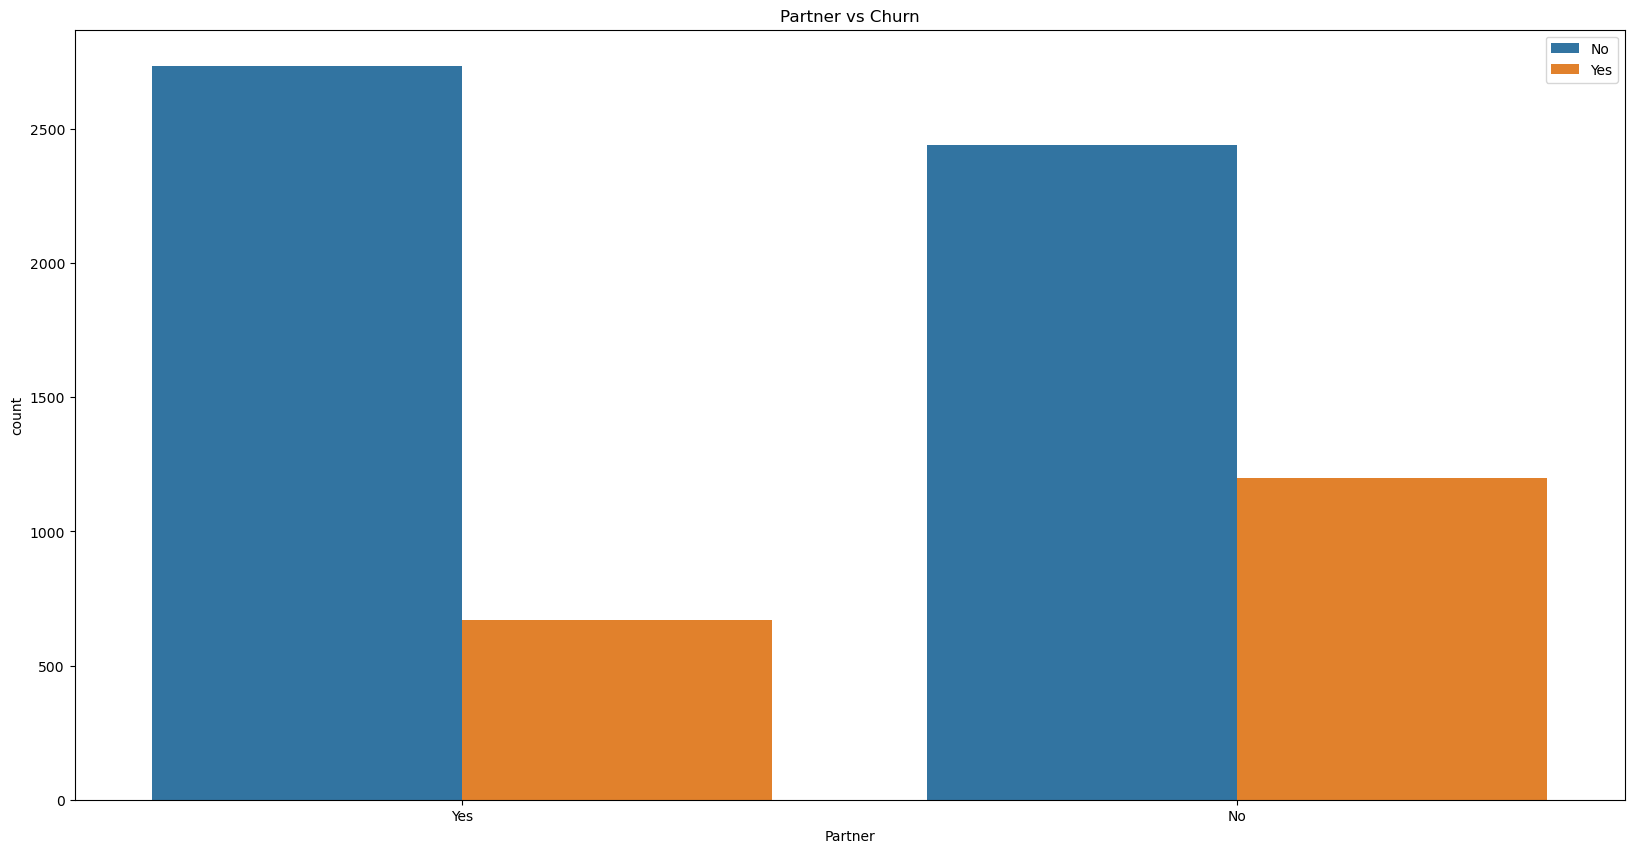

Churn,No,Yes,yes percentage,no percentage,percentage of Partner
Partner,,,,,
No,2441,1200,0.329580,0.670420,51.7
Yes,2733,669,0.196649,0.803351,48.3


In [31]:
categorical("Partner")

### Dependents

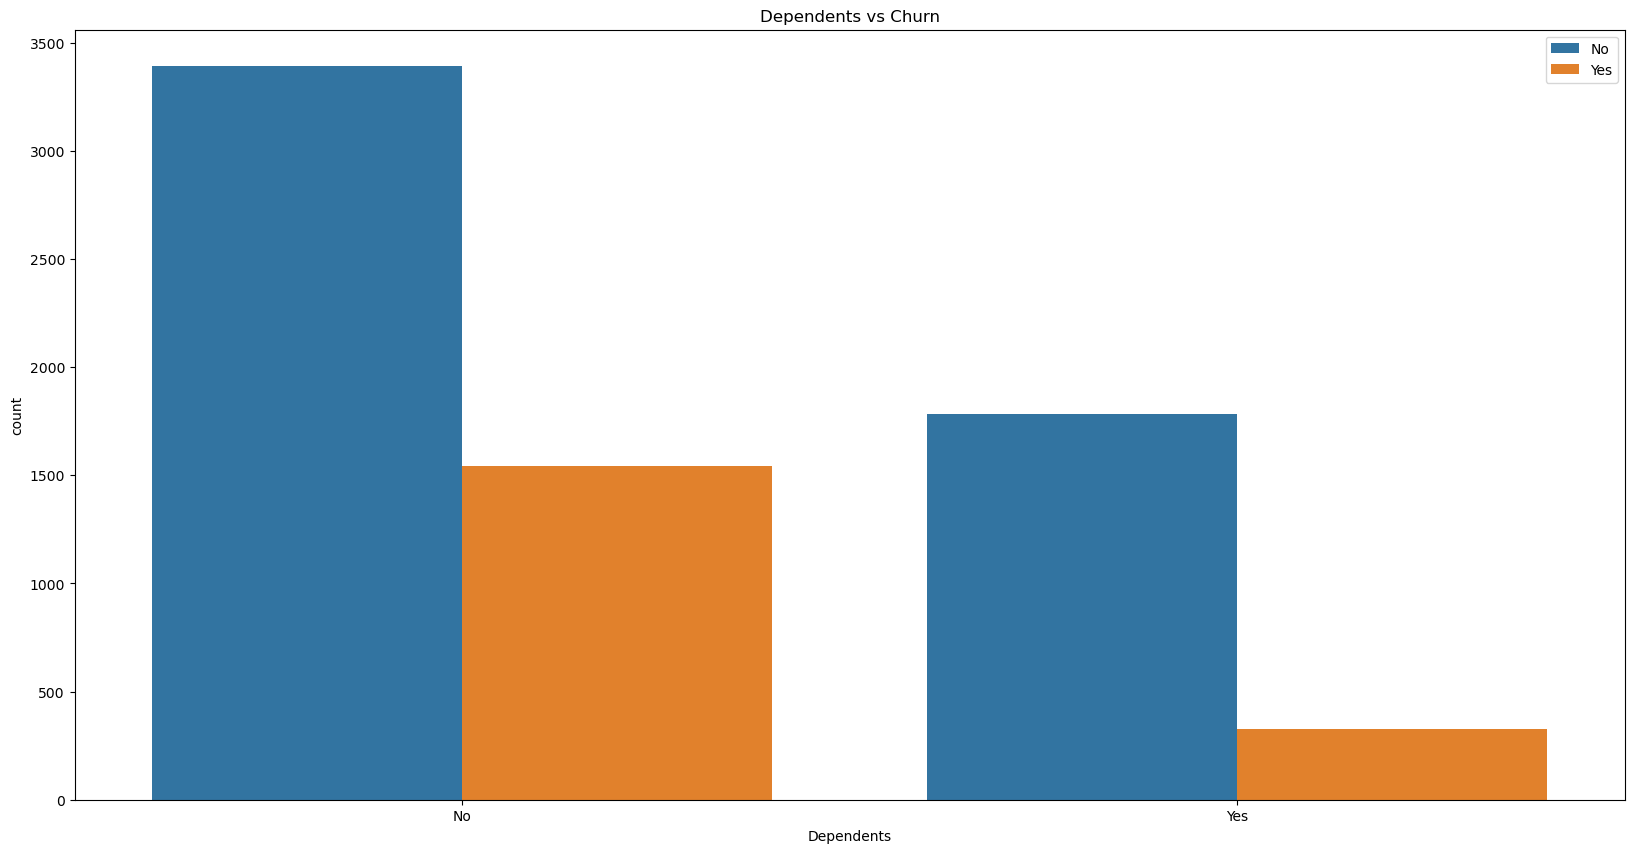

Churn,No,Yes,yes percentage,no percentage,percentage of Dependents
Dependents,,,,,
No,3390,1543,0.312791,0.687209,70.04
Yes,1784,326,0.154502,0.845498,29.96


In [32]:
categorical("Dependents")

### PhoneService

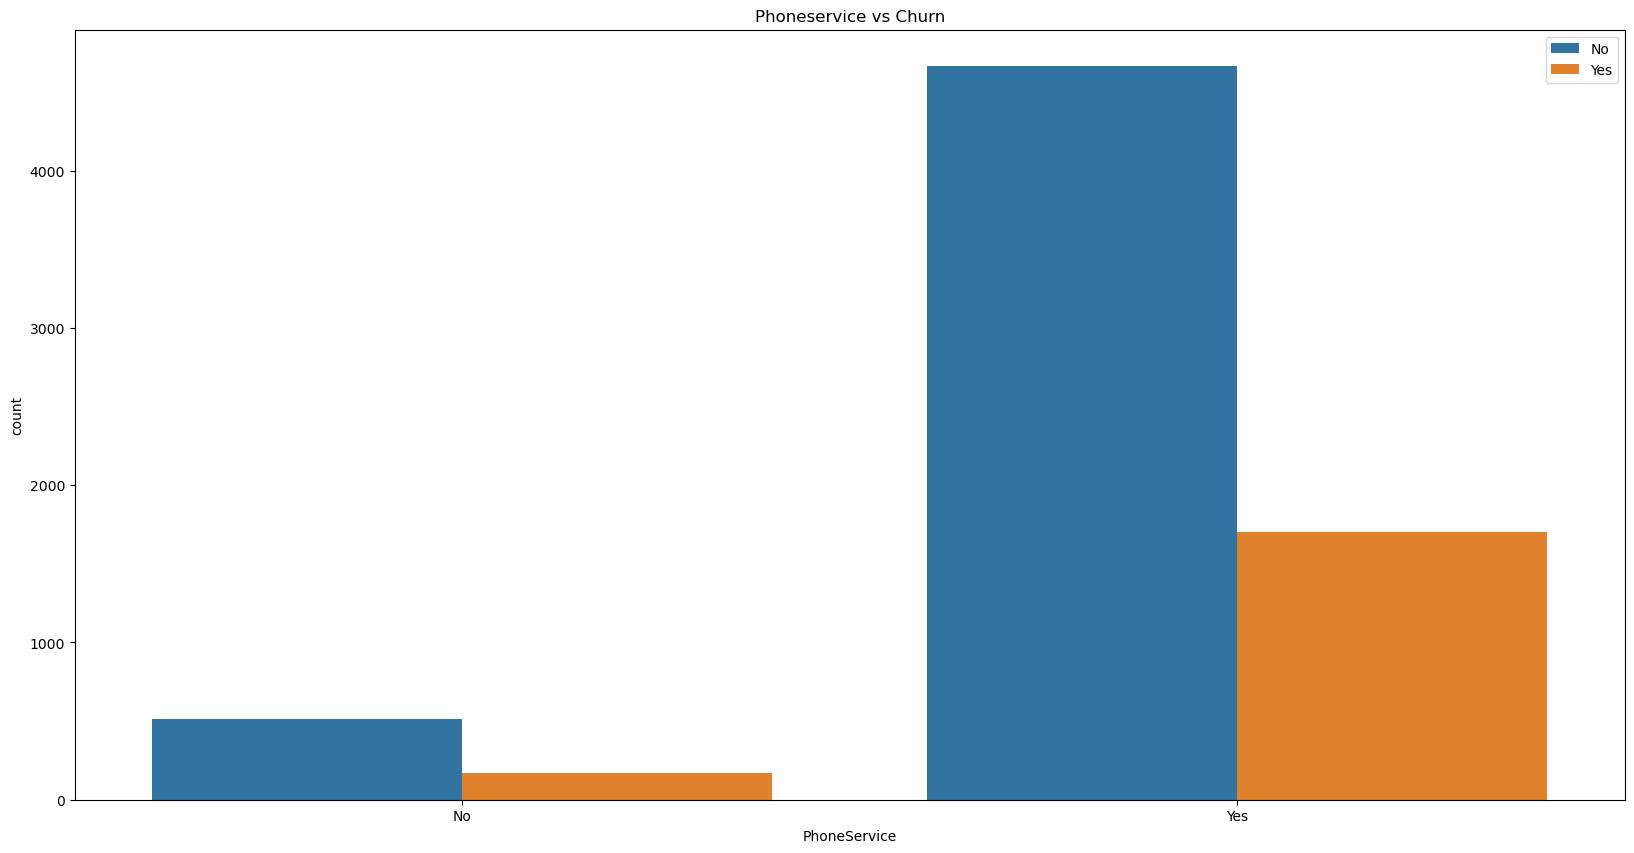

Churn,No,Yes,yes percentage,no percentage,percentage of PhoneService
PhoneService,,,,,
Yes,4662,1699,0.267096,0.732904,90.32
No,512,170,0.249267,0.750733,9.68


In [33]:
categorical("PhoneService")

### MultipleLines

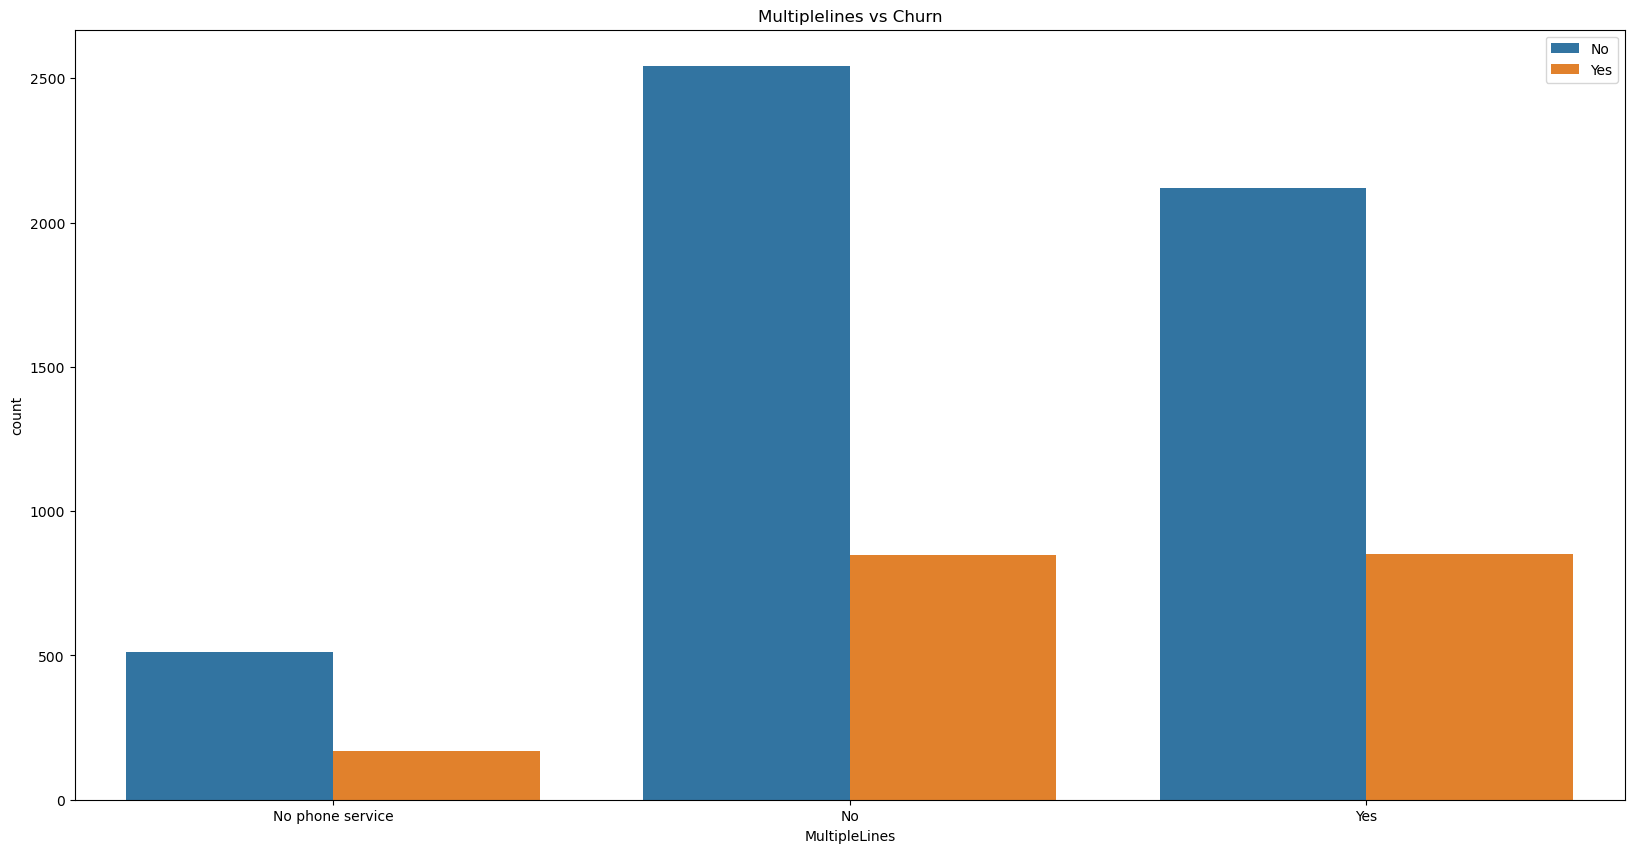

Churn,No,Yes,yes percentage,no percentage,percentage of MultipleLines
MultipleLines,,,,,
Yes,2121,850,0.286099,0.713901,42.18
No,2541,849,0.250442,0.749558,48.13
No phone service,512,170,0.249267,0.750733,9.68


In [34]:
categorical("MultipleLines")

### InternetService

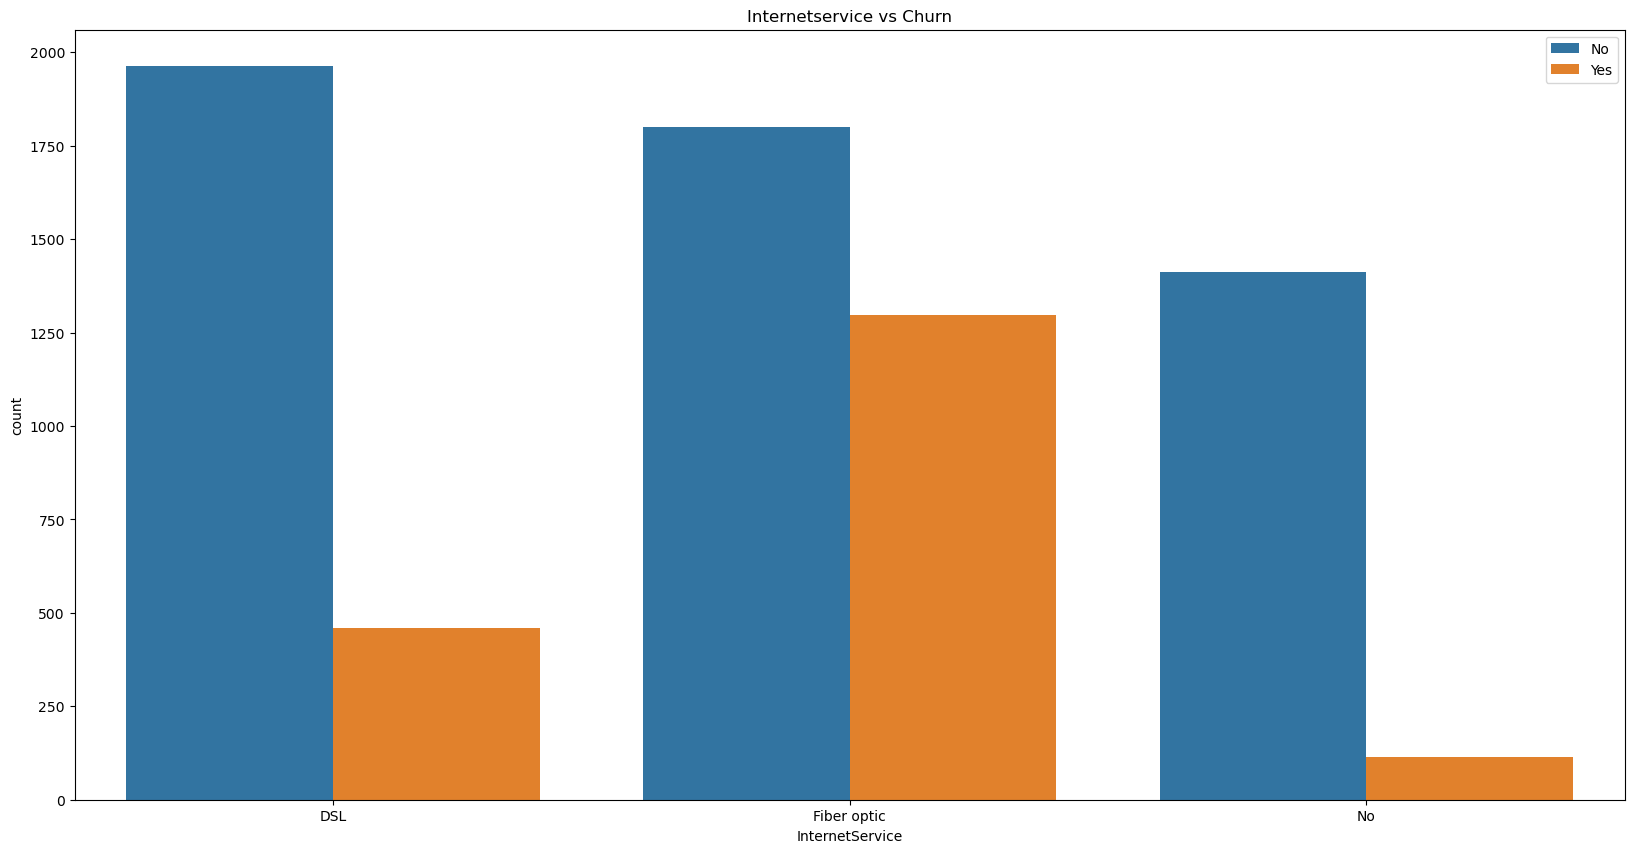

Churn,No,Yes,yes percentage,no percentage,percentage of InternetService
InternetService,,,,,
Fiber optic,1799,1297,0.418928,0.581072,43.96
DSL,1962,459,0.189591,0.810409,34.37
No,1413,113,0.074050,0.925950,21.67


In [35]:
categorical("InternetService")

### OnlineSecurity

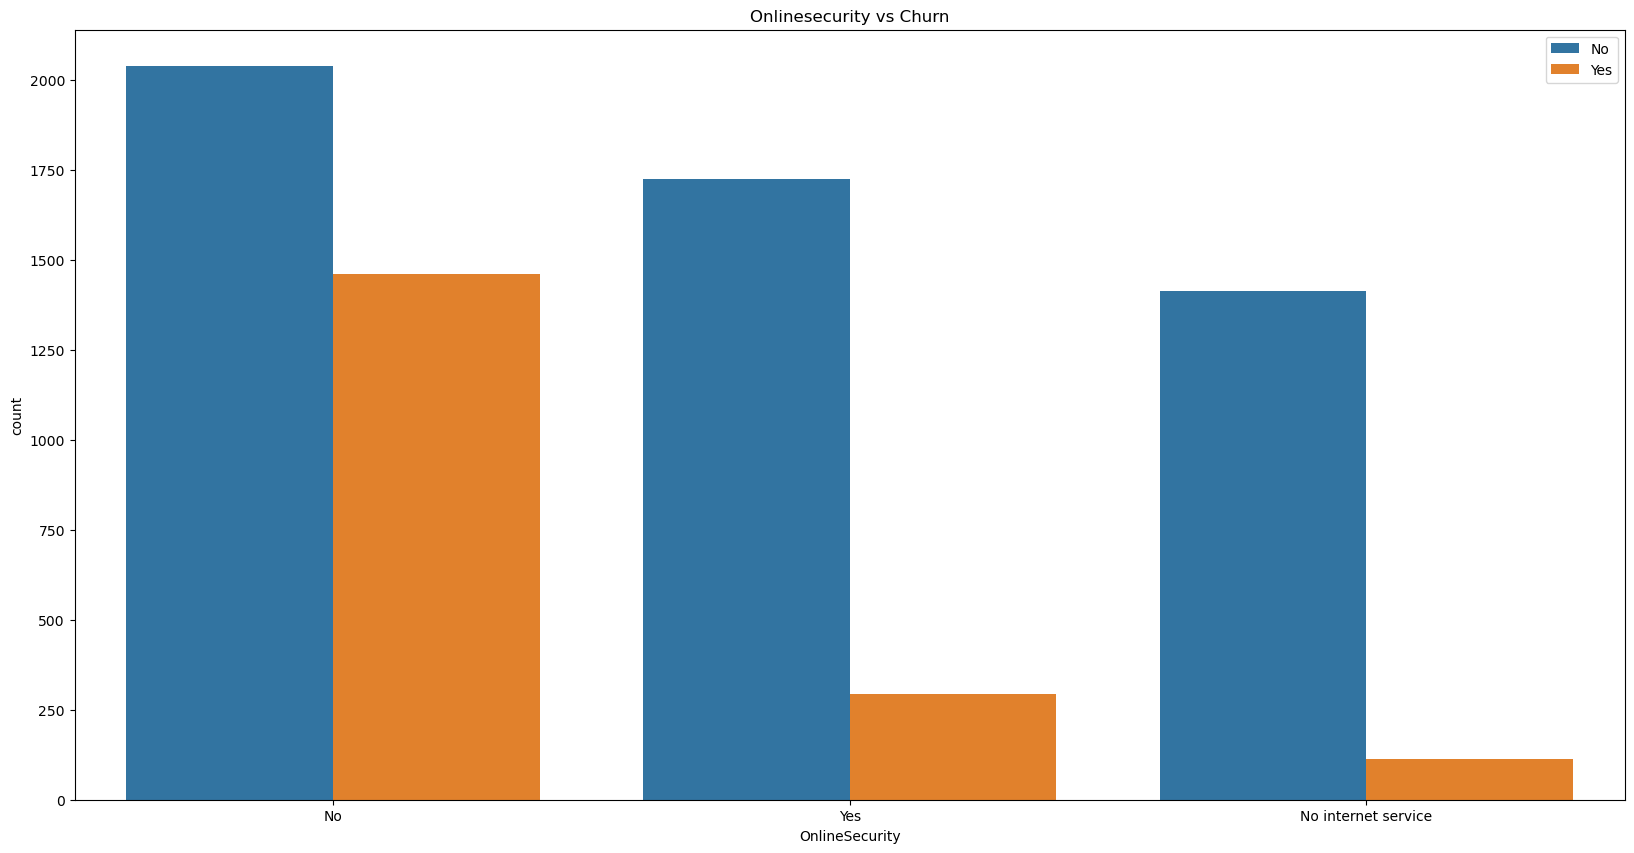

Churn,No,Yes,yes percentage,no percentage,percentage of OnlineSecurity
OnlineSecurity,,,,,
No,2037,1461,0.417667,0.582333,49.67
Yes,1724,295,0.146112,0.853888,28.67
No internet service,1413,113,0.074050,0.925950,21.67


In [36]:
categorical("OnlineSecurity")

### OnlineBackup

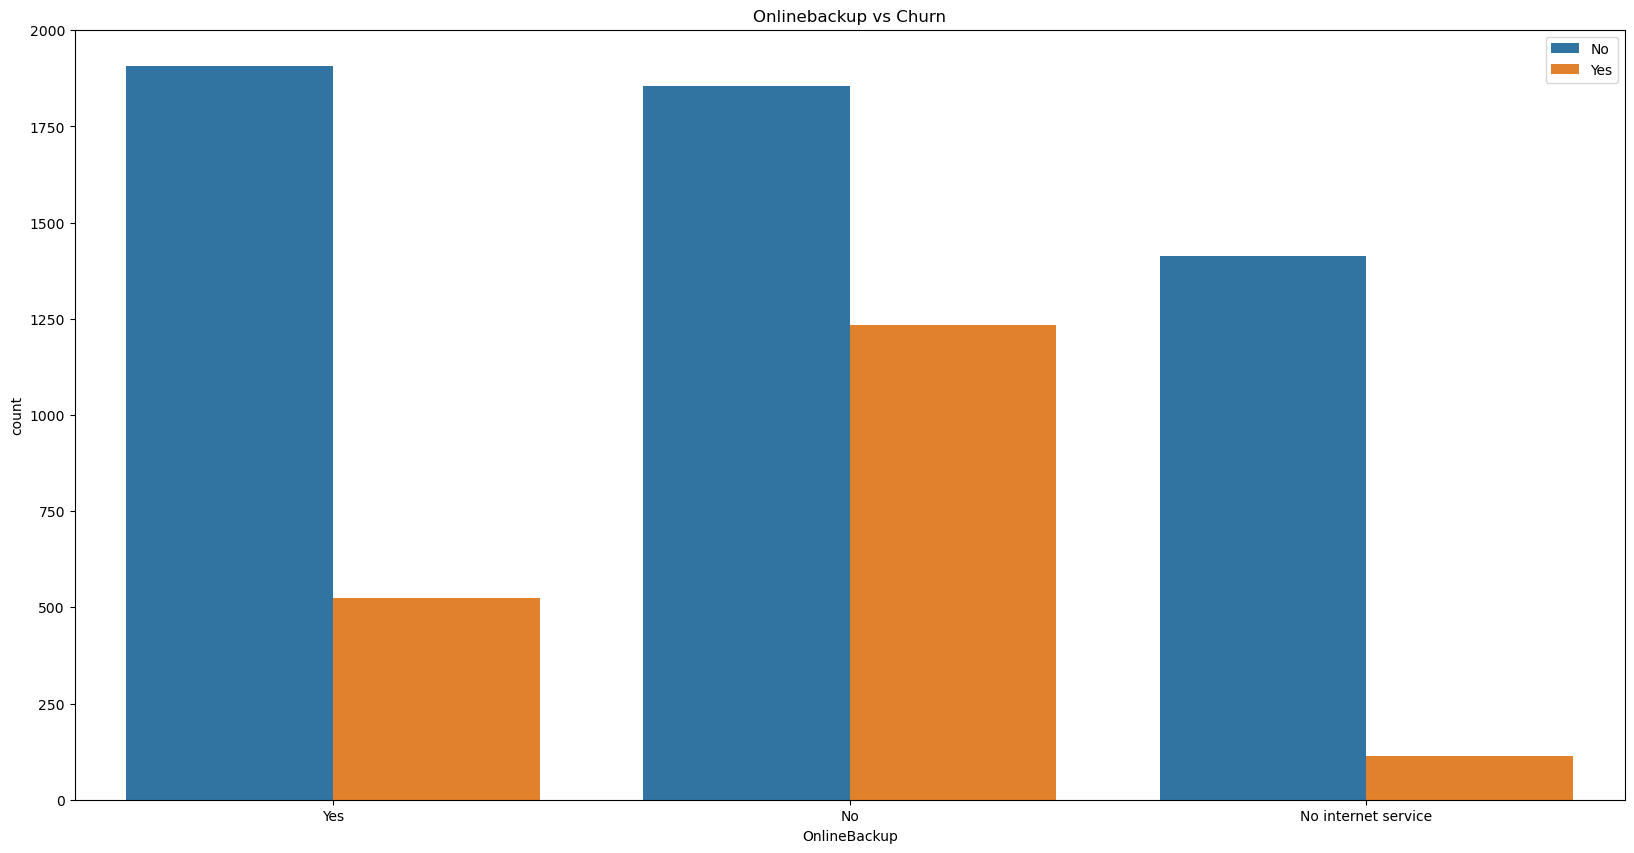

Churn,No,Yes,yes percentage,no percentage,percentage of OnlineBackup
OnlineBackup,,,,,
No,1855,1233,0.399288,0.600712,43.84
Yes,1906,523,0.215315,0.784685,34.49
No internet service,1413,113,0.074050,0.925950,21.67


In [37]:
categorical("OnlineBackup")

### DeviceProtection

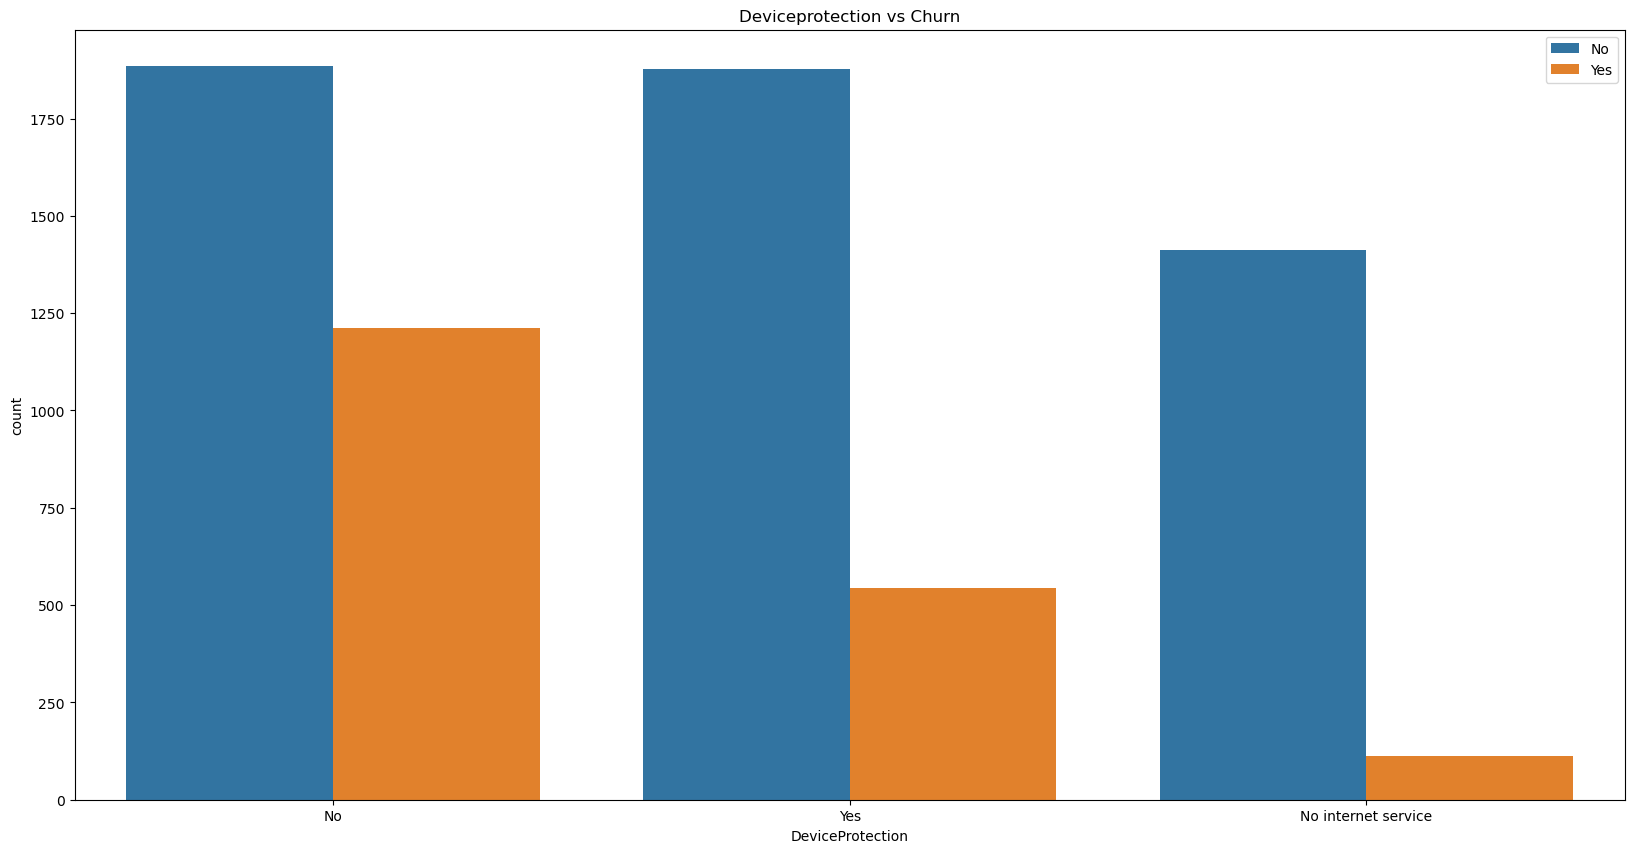

Churn,No,Yes,yes percentage,no percentage,percentage of DeviceProtection
DeviceProtection,,,,,
No,1884,1211,0.391276,0.608724,43.94
Yes,1877,545,0.225021,0.774979,34.39
No internet service,1413,113,0.074050,0.925950,21.67


In [38]:
categorical("DeviceProtection")

### TechSupport

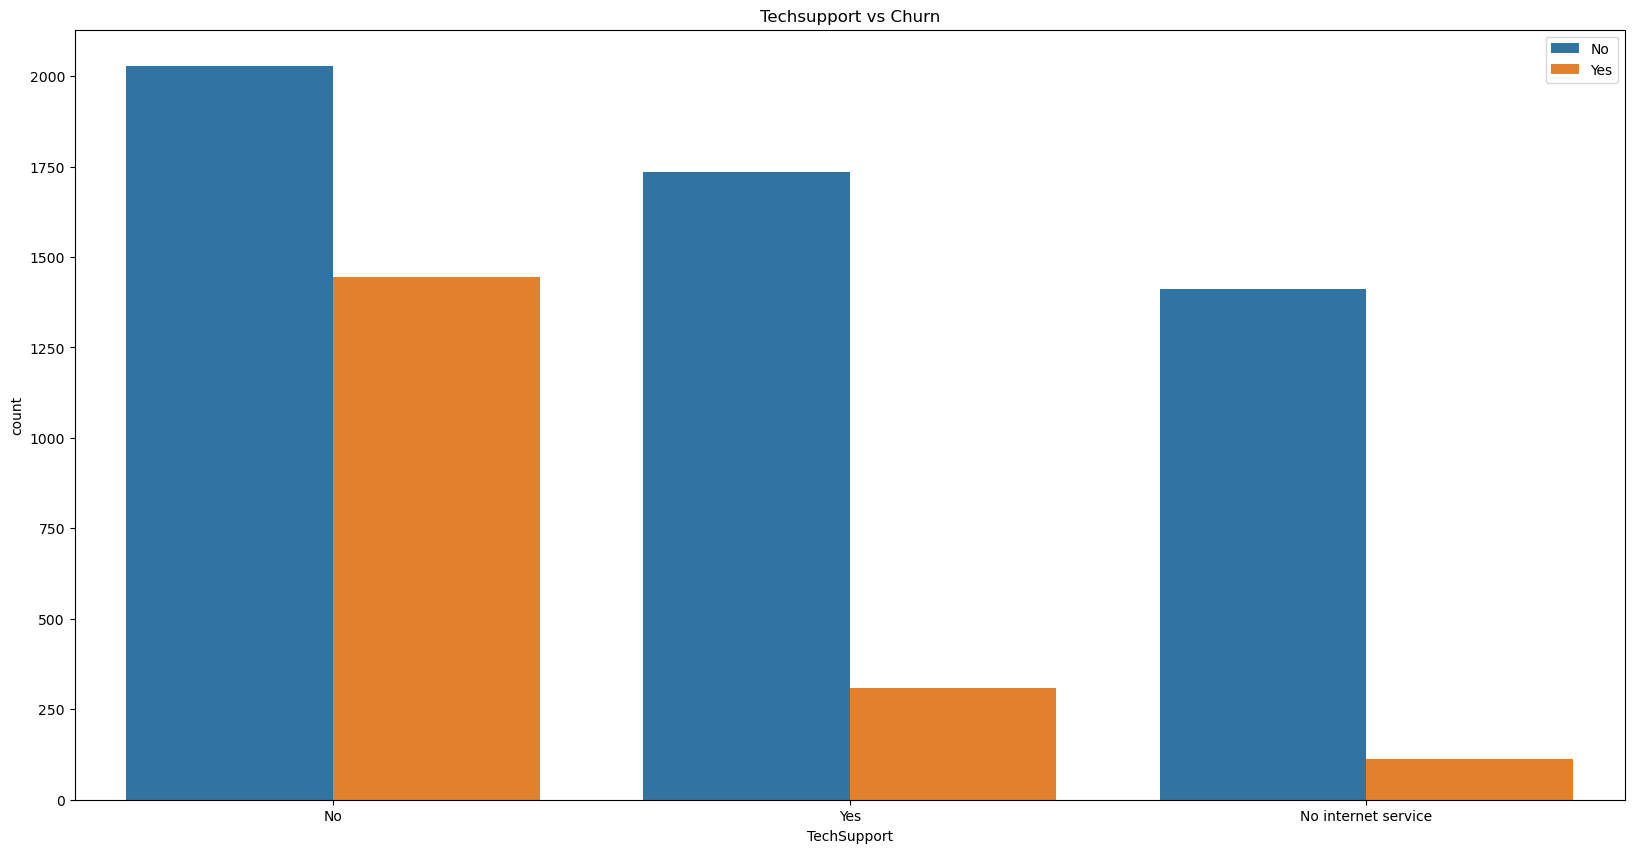

Churn,No,Yes,yes percentage,no percentage,percentage of TechSupport
TechSupport,,,,,
No,2027,1446,0.416355,0.583645,49.31
Yes,1734,310,0.151663,0.848337,29.02
No internet service,1413,113,0.074050,0.925950,21.67


In [39]:
categorical("TechSupport")

### StreamingTV

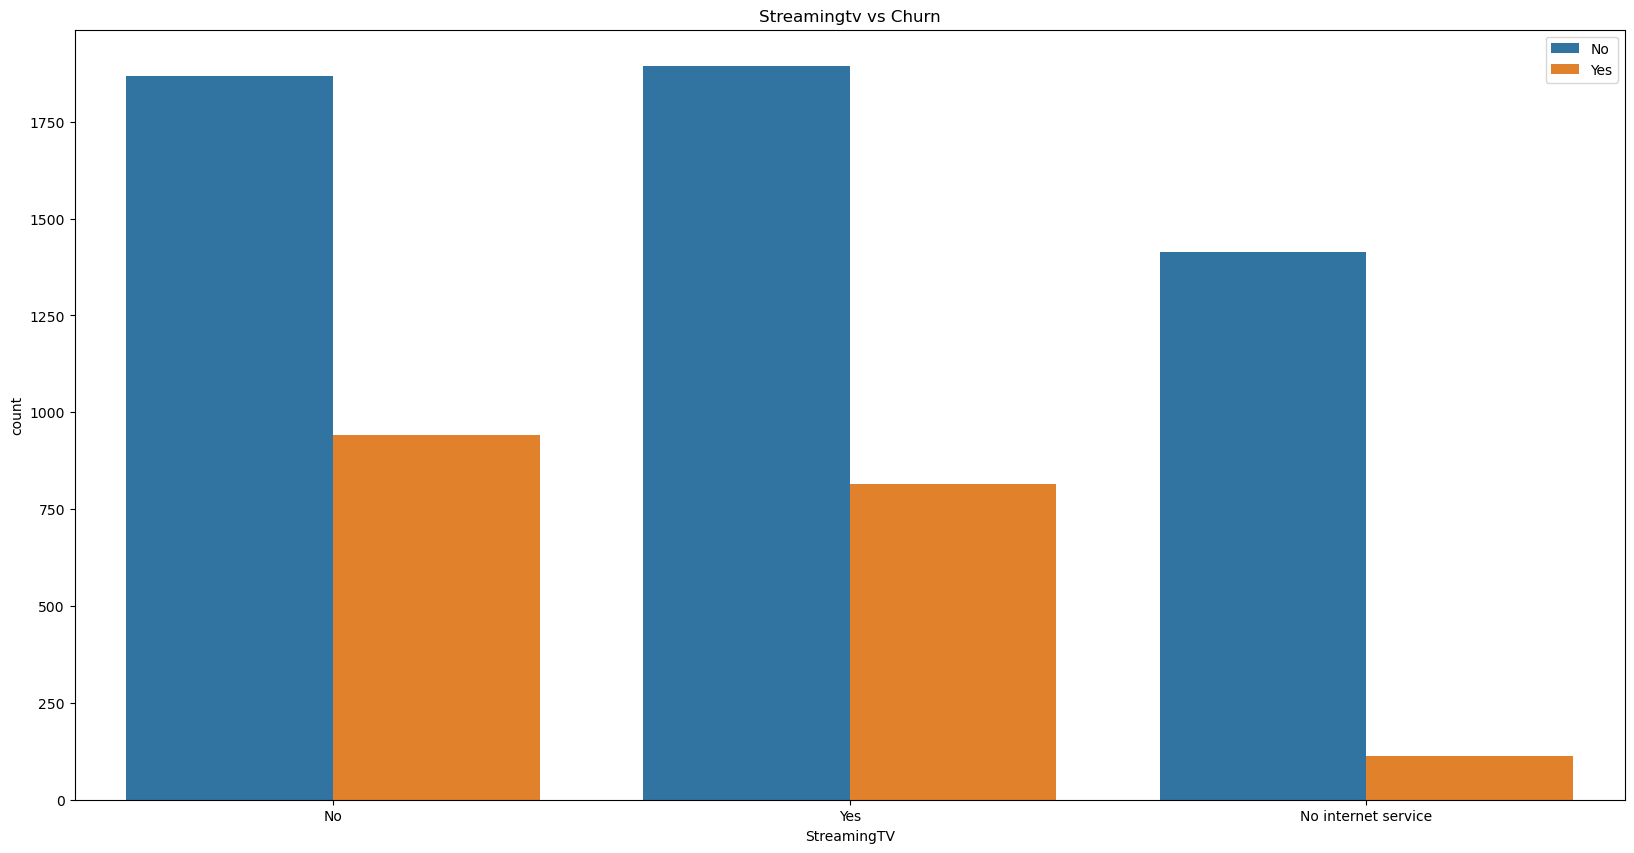

Churn,No,Yes,yes percentage,no percentage,percentage of StreamingTV
StreamingTV,,,,,
No,1868,942,0.335231,0.664769,39.90
Yes,1893,814,0.300702,0.699298,38.44
No internet service,1413,113,0.074050,0.925950,21.67


In [40]:
categorical("StreamingTV")

### StreamingMovies

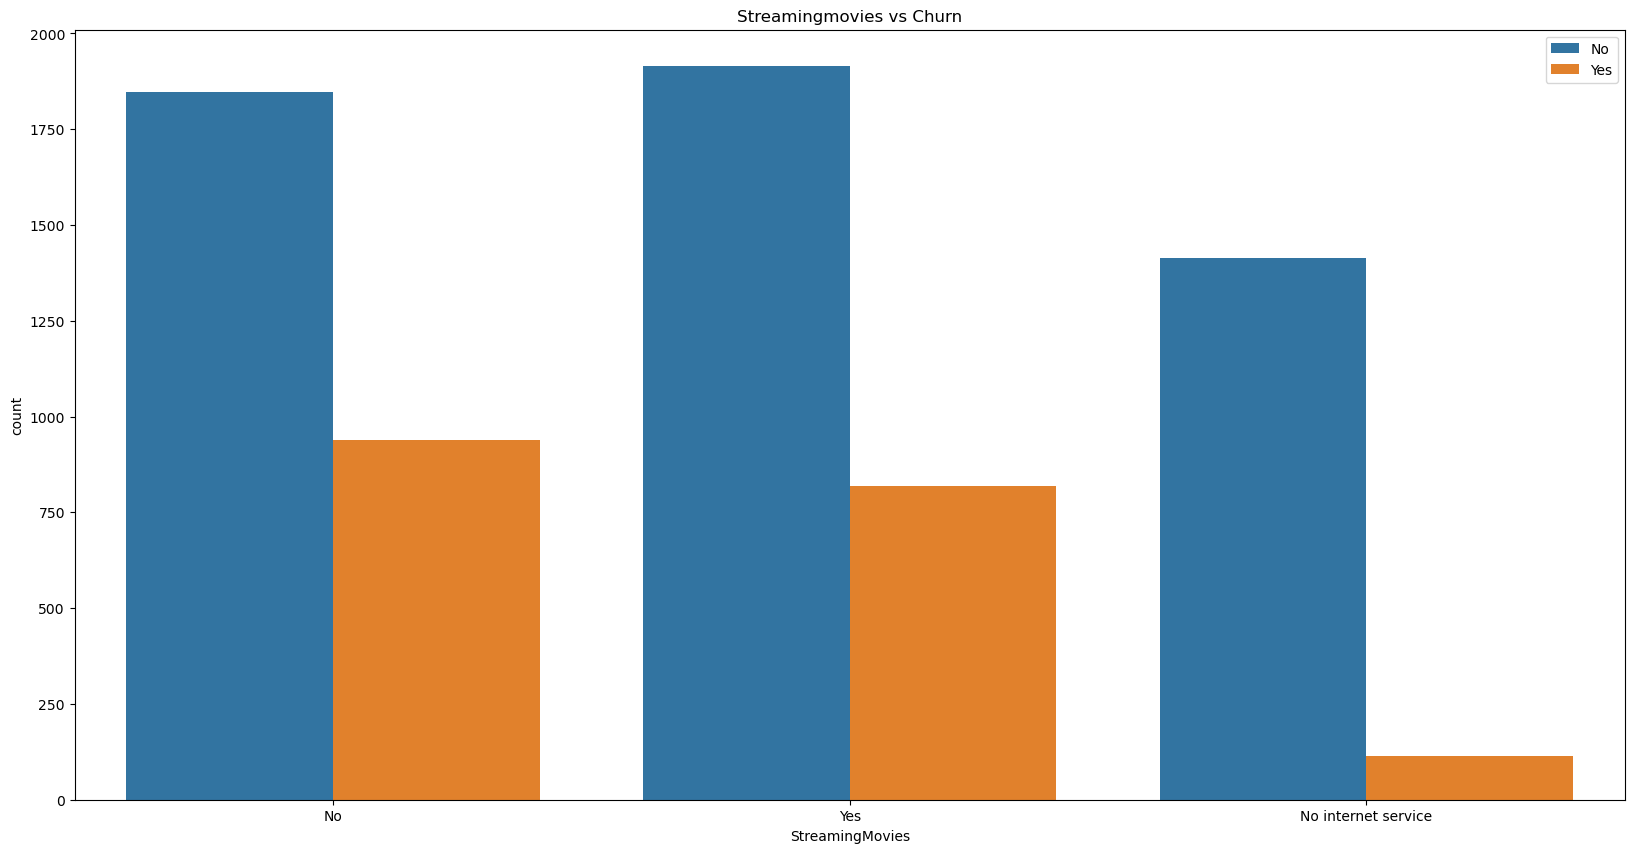

Churn,No,Yes,yes percentage,no percentage,percentage of StreamingMovies
StreamingMovies,,,,,
No,1847,938,0.336804,0.663196,39.54
Yes,1914,818,0.299414,0.700586,38.79
No internet service,1413,113,0.074050,0.925950,21.67


In [41]:
categorical("StreamingMovies")

### Contract

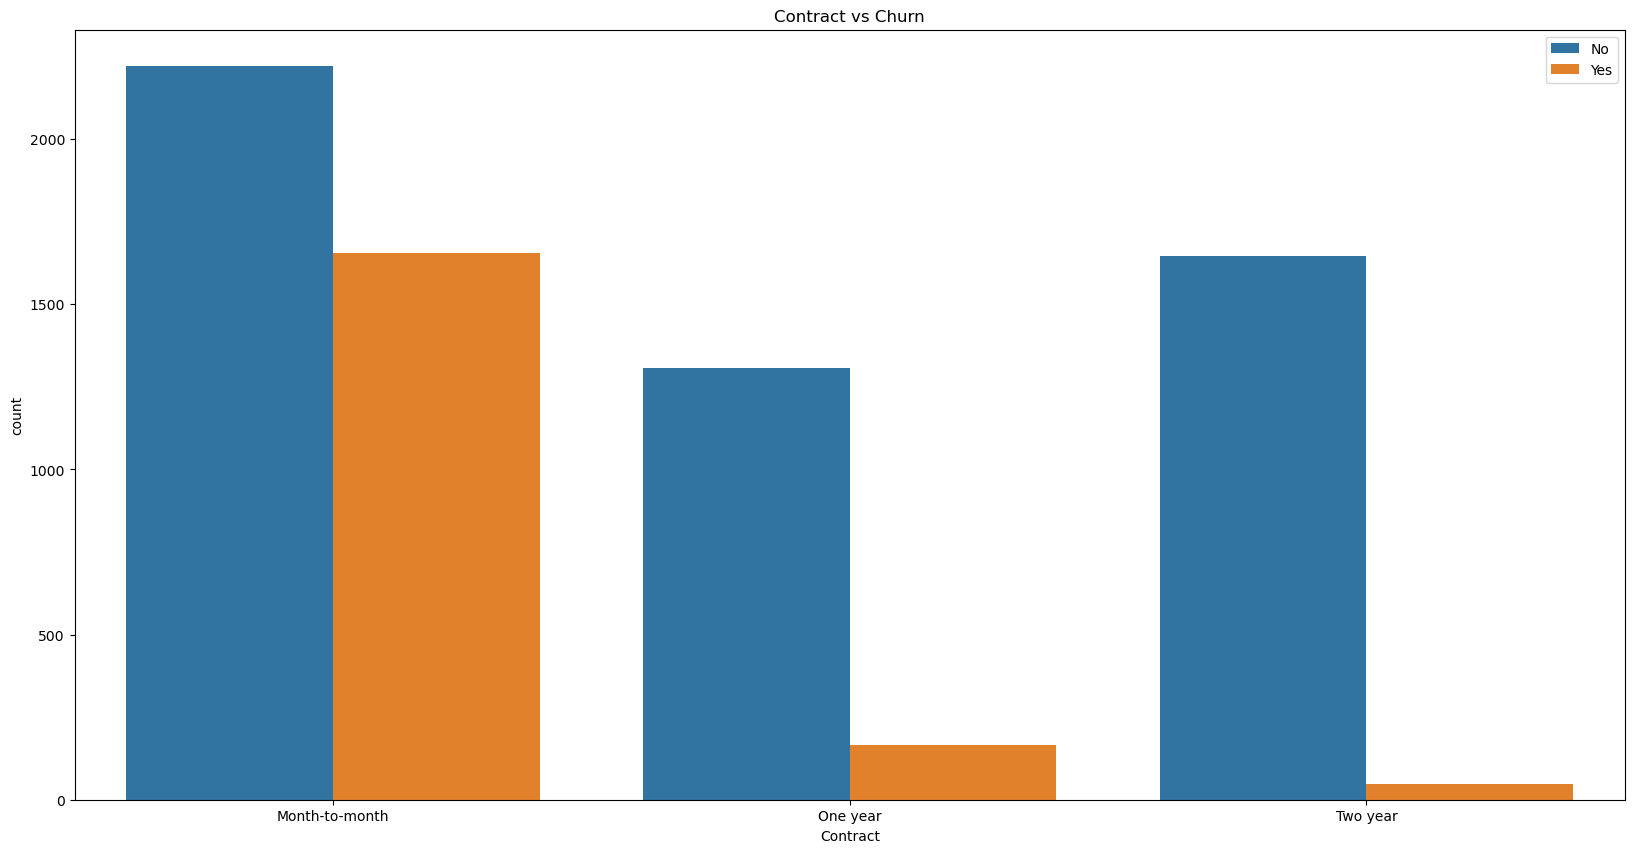

Churn,No,Yes,yes percentage,no percentage,percentage of Contract
Contract,,,,,
Month-to-month,2220,1655,0.427097,0.572903,55.02
One year,1307,166,0.112695,0.887305,20.91
Two year,1647,48,0.028319,0.971681,24.07


In [42]:
categorical("Contract")

> Berdasarkan tabel dan crosstab tersebut, dapat dilihat bahwa pelanggan yang paling banyak berhenti berlangganan adalah pelangganan yang kontrak berlangganannya adalah bulanan, sedangkan yang kontrak satu dan dua tahun cukup sedikit.

### PaperlessBilling

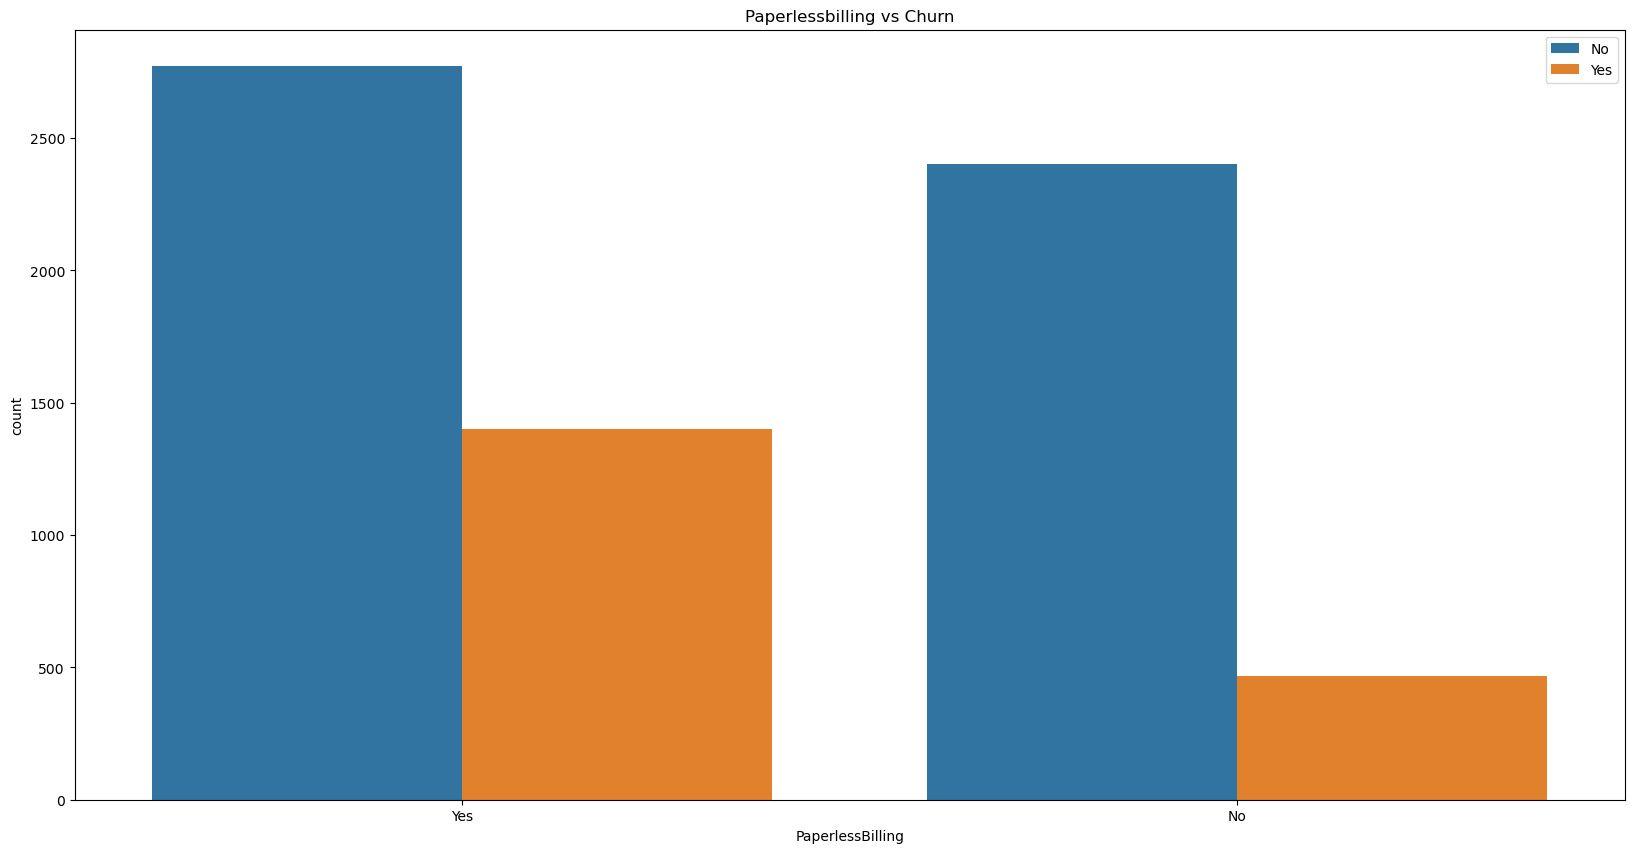

Churn,No,Yes,yes percentage,no percentage,percentage of PaperlessBilling
PaperlessBilling,,,,,
Yes,2771,1400,0.335651,0.664349,59.22
No,2403,469,0.163301,0.836699,40.78


In [43]:
categorical("PaperlessBilling")

### PaymentMethod

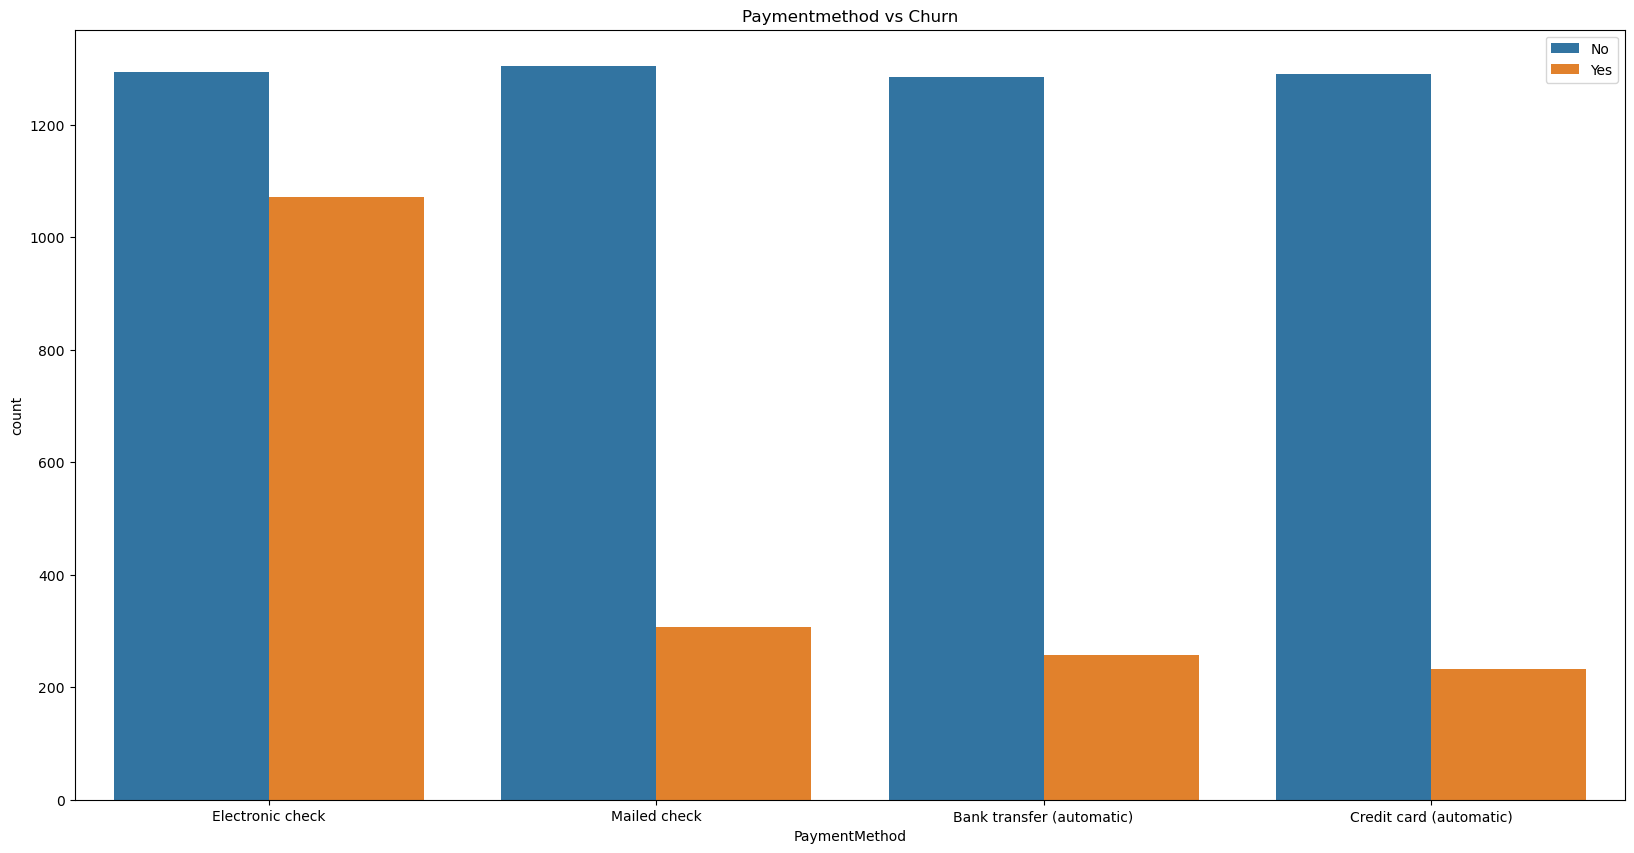

Churn,No,Yes,yes percentage,no percentage,percentage of PaymentMethod
PaymentMethod,,,,,
Electronic check,1294,1071,0.452854,0.547146,33.58
Mailed check,1304,308,0.191067,0.808933,22.89
Bank transfer (automatic),1286,258,0.167098,0.832902,21.92
Credit card (automatic),1290,232,0.152431,0.847569,21.61


In [44]:
categorical("PaymentMethod")

> Berdasarkan grafik tersebut, dapat terlihat bahwa pelanggan yang membayar menggunakan Electronic CHeck merupakan yang paling banyak meninggalkan berlangganan. Sedangkan pada metode pembayaran lainnya, memiliki persentase yang tidak jauh berbeda.

## Conclusion From the Exploratory Data Analysis

# Feature Engineering

In [45]:
# check values of columns
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values, df[i].dtypes])

data = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values", "type"])
data

,column,null values,unique number,values,type
0,customerID,0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",object
1,gender,0,2,"[Female, Male]",object
2,SeniorCitizen,0,2,"[No, Yes]",object
3,Partner,0,2,"[Yes, No]",object
4,Dependents,0,2,"[No, Yes]",object
5,tenure,0,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",int64
6,PhoneService,0,2,"[No, Yes]",object
7,MultipleLines,0,3,"[No phone service, No, Yes]",object
8,InternetService,0,3,"[DSL, Fiber optic, No]",object
9,OnlineSecurity,0,3,"[No, Yes, No internet service]",object


> Gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling perlu dilakukan replace dengan 0 dan 1

> Churn perlu dilakukan LabelEncoder

> 

In [46]:
df_ensemble = df.copy()

## Scaling

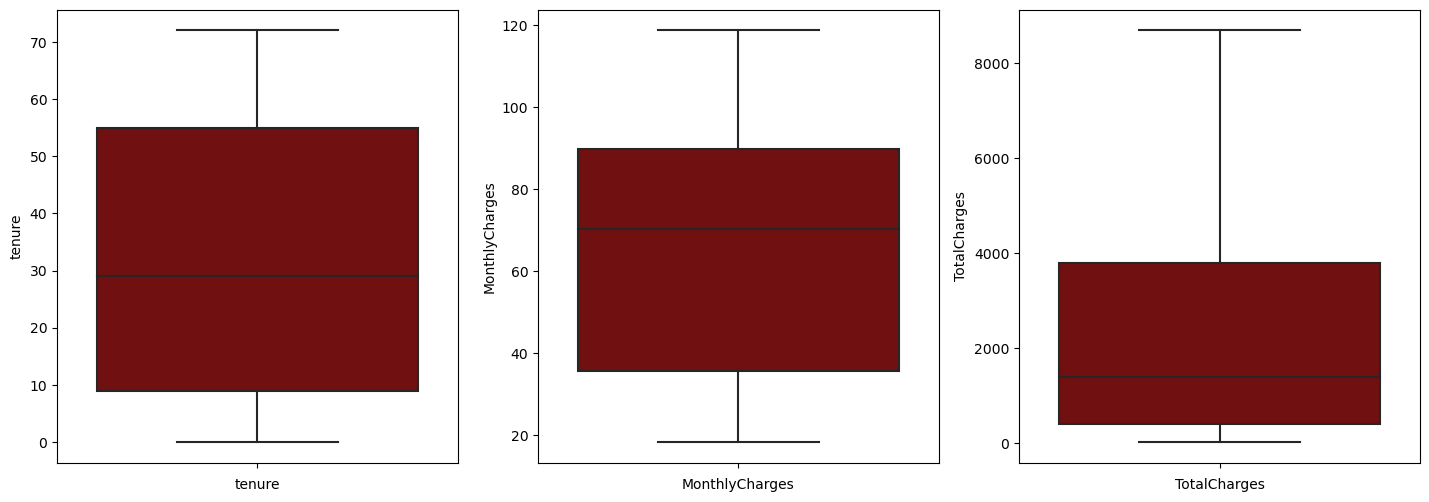

In [47]:
# Checking the Outlier from the numerical data
numerical = df.select_dtypes(include = ["int64","float64"]).columns
numerical
plt.figure(figsize=(30,20))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[numerical[i]], color='maroon', orient='v')
    plt.xlabel(numerical[i]);

In [48]:
# Scaling using RobustScaler for tenure column
df_ensemble["tenure"] = RobustScaler().fit_transform(df_ensemble[["tenure"]])

In [49]:
# Scaling using RobustScaler for monthlycharges column
df_ensemble["MonthlyCharges"] = RobustScaler().fit_transform(df_ensemble[["MonthlyCharges"]])

In [50]:
# Scaling using RobustScaler for totalcharges column
df_ensemble["TotalCharges"] = RobustScaler().fit_transform(df_ensemble[["TotalCharges"]])

## Encode the Data

In [51]:
# LabelEncoder untuk Target Feature
df_ensemble["Churn"] = LabelEncoder().fit_transform(df_ensemble["Churn"])

# Replace the Nominal Data
df_ensemble['gender'].replace({"Female": 0, "Male": 1}, inplace = True)
df_ensemble['SeniorCitizen'].replace({"No": 0, "Yes": 1}, inplace = True)
df_ensemble['Partner'].replace({"No": 0, "Yes": 1}, inplace = True)
df_ensemble['Dependents'].replace({"No": 0, "Yes": 1}, inplace = True)
df_ensemble['PhoneService'].replace({"No": 0, "Yes": 1}, inplace = True)
df_ensemble['PaperlessBilling'].replace({"No": 0, "Yes": 1}, inplace = True)

# GetDummies for Transform the Nominal Data which is more than 2 value
df_ensemble = pd.get_dummies(df_ensemble, prefix='PM', columns=['PaymentMethod'])
df_ensemble = pd.get_dummies(df_ensemble, prefix="Contract", columns=["Contract"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="SM", columns=["StreamingMovies"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="STV", columns=["StreamingTV"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="TS", columns=["TechSupport"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="DP", columns=["DeviceProtection"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="OB", columns=["OnlineBackup"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="OS", columns=["OnlineSecurity"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="IS", columns=["InternetService"])
df_ensemble = pd.get_dummies(df_ensemble, prefix="ML", columns=["MultipleLines"])

In [52]:
# Show the dataframe made before (after encoding)
df_ensemble

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OB_Yes,OS_No,OS_No internet service,OS_Yes,IS_DSL,IS_Fiber optic,IS_No,ML_No,ML_No phone service,ML_Yes
0,7590-VHVEG,0,0,1,0,-0.608696,0,1,-0.745170,-0.404100,...,1,1,0,0,1,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.108696,1,0,-0.246550,0.145381,...,0,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,-0.586957,1,1,-0.303588,-0.380964,...,1,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,0.347826,0,0,-0.516099,0.130977,...,0,0,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,-0.586957,1,1,0.006440,-0.368111,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,-0.108696,1,1,0.265869,0.175224,...,0,0,0,1,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,0.934783,1,1,0.604416,1.762637,...,1,1,0,0,0,1,0,0,0,1
7040,4801-JZAZL,0,0,1,1,-0.391304,0,1,-0.749770,-0.310552,...,0,0,0,1,1,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,-0.543478,1,1,0.074517,-0.322327,...,0,1,0,0,0,1,0,0,0,1


In [53]:
# Checking the dataframe
df_ensemble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customerID                    7043 non-null   object 
 1   gender                        7043 non-null   int64  
 2   SeniorCitizen                 7043 non-null   int64  
 3   Partner                       7043 non-null   int64  
 4   Dependents                    7043 non-null   int64  
 5   tenure                        7043 non-null   float64
 6   PhoneService                  7043 non-null   int64  
 7   PaperlessBilling              7043 non-null   int64  
 8   MonthlyCharges                7043 non-null   float64
 9   TotalCharges                  7043 non-null   float64
 10  Churn                         7043 non-null   int32  
 11  PM_Bank transfer (automatic)  7043 non-null   uint8  
 12  PM_Credit card (automatic)    7043 non-null   uint8  
 13  PM_

In [54]:
# Select the uint8 datatype columns for changing the data into float64
uint_columns = df_ensemble.select_dtypes("uint8").columns

# changing the data into float64
df_ensemble[uint_columns] = df_ensemble[uint_columns].astype("float64")

In [55]:
# changing the data into float64
df_ensemble[uint_columns] = df_ensemble[uint_columns].astype("float64")

In [56]:
# Checking the Dataframe
df_ensemble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customerID                    7043 non-null   object 
 1   gender                        7043 non-null   int64  
 2   SeniorCitizen                 7043 non-null   int64  
 3   Partner                       7043 non-null   int64  
 4   Dependents                    7043 non-null   int64  
 5   tenure                        7043 non-null   float64
 6   PhoneService                  7043 non-null   int64  
 7   PaperlessBilling              7043 non-null   int64  
 8   MonthlyCharges                7043 non-null   float64
 9   TotalCharges                  7043 non-null   float64
 10  Churn                         7043 non-null   int32  
 11  PM_Bank transfer (automatic)  7043 non-null   float64
 12  PM_Credit card (automatic)    7043 non-null   float64
 13  PM_

In [57]:
# Dropping the unneeded columns
df_ensemble.drop(columns = "customerID", inplace=True)

## Select Features

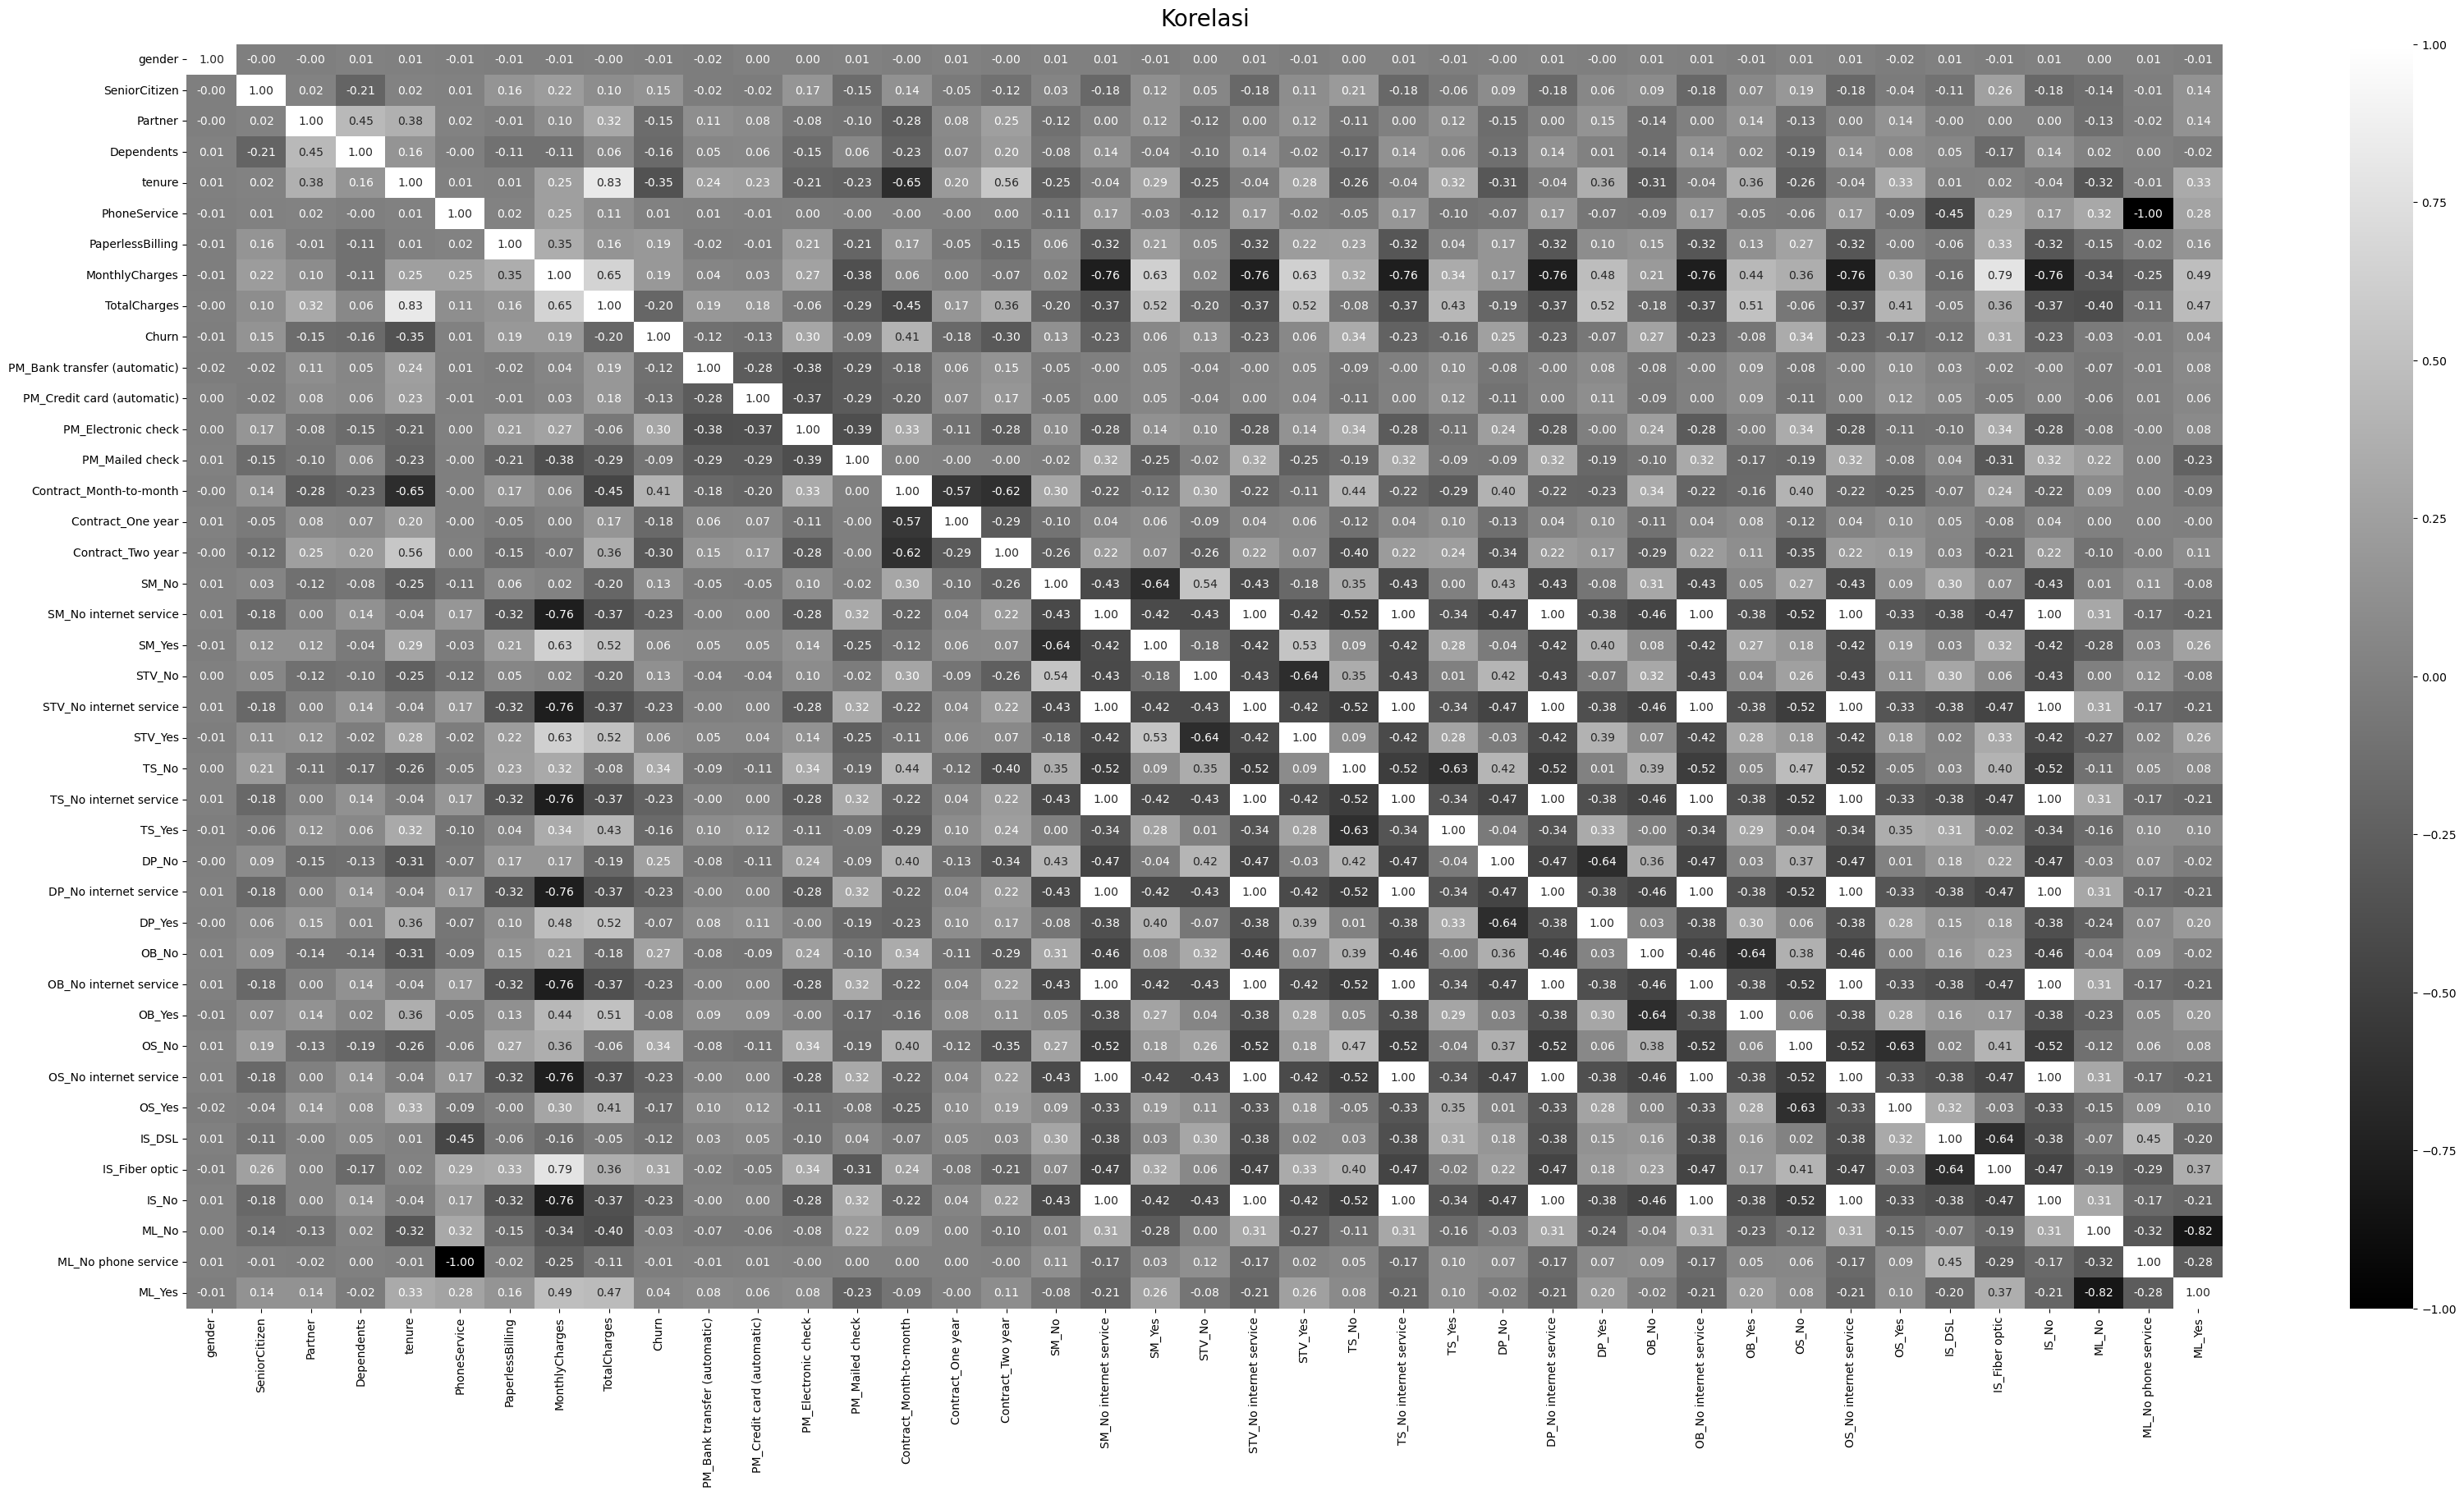

In [58]:
# Show the correlation from every columns
plt.figure(figsize=(40,20))
heatmaps=sns.heatmap(df_ensemble.corr(),cmap='gray', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':20}, pad=16);

In [59]:
# Separating between variable x and variable y
X=df_ensemble.drop(['Churn'], axis=1)
y=df_ensemble['Churn']

In [60]:
# Create a SelectKBest dataframe to see the score in each column
anov = SelectKBest(score_func = f_classif)
fit = anov.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [61]:
# Create a SelectKBest dataframe to see the score in each column
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

In [62]:
# Show the SelectKBest Dataframe made before
featureScores.nlargest(50, 'Score')

,Specs,Score
13,Contract_Month-to-month,1382.340697
4,tenure,997.268010
31,OS_No,936.566070
22,TS_No,903.785170
35,IS_Fiber optic,738.046042
15,Contract_Two year,707.919254
11,PM_Electronic check,706.195028
28,OB_No,544.868484
25,DP_No,479.401833
20,STV_No internet service,385.698588


In [63]:
# Selecting the good features for modeling based on SelectKBest and Correlation matrix
X[["Contract_Month-to-month", "tenure", "OS_No", "TS_No", "IS_Fiber optic",
   "PM_Electronic check", "OB_No", "DP_No", "STV_No internet service", "SM_No internet service",
   "TotalCharges", "MonthlyCharges", "PaperlessBilling", "Dependents", "SeniorCitizen", "Partner"]]

,Contract_Month-to-month,tenure,OS_No,TS_No,IS_Fiber optic,PM_Electronic check,OB_No,DP_No,STV_No internet service,SM_No internet service,TotalCharges,MonthlyCharges,PaperlessBilling,Dependents,SeniorCitizen,Partner
0,1.0,-0.608696,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.404100,-0.745170,1,0,0,1
1,0.0,0.108696,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.145381,-0.246550,0,0,0,0
2,1.0,-0.586957,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.380964,-0.303588,1,0,0,0
3,0.0,0.347826,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.130977,-0.516099,0,0,0,0
4,1.0,-0.586957,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.368111,0.006440,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,-0.108696,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.175224,0.265869,1,1,0,1
7039,0.0,0.934783,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.762637,0.604416,1,1,0,1
7040,1.0,-0.391304,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.310552,-0.749770,1,1,0,1
7041,1.0,-0.543478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.322327,0.074517,1,0,1,1


In [64]:
# Show the X Features
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PM_Bank transfer (automatic),...,OB_Yes,OS_No,OS_No internet service,OS_Yes,IS_DSL,IS_Fiber optic,IS_No,ML_No,ML_No phone service,ML_Yes
0,0,0,1,0,-0.608696,0,1,-0.745170,-0.404100,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.108696,1,0,-0.246550,0.145381,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,-0.586957,1,1,-0.303588,-0.380964,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0.347826,0,0,-0.516099,0.130977,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,-0.586957,1,1,0.006440,-0.368111,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.108696,1,1,0.265869,0.175224,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,0.934783,1,1,0.604416,1.762637,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7040,0,0,1,1,-0.391304,0,1,-0.749770,-0.310552,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,-0.543478,1,1,0.074517,-0.322327,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [65]:
# Show the y
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Modeling

## Train Test Split Data

In [66]:
# trains test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

### SMOTE Data

In [67]:
# Checking before Resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (5634, 40)
y_train sebelum Resampling (5634,) 

label '1' sebelum Resampling 1501
label '0' sebelum Resampling 4133


In [68]:
# Resampling using SMOTE
st = SMOTE()
X_train_st, y_train_st = st.fit_resample(X_train, y_train)

In [69]:
# Checking after Resampling 
print('X_train sesudah Resampling', X_train_st.shape)
print('y_train sesudah Resampling', y_train_st.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_st == 1))
print("label '0' sesudah Resampling", sum(y_train_st == 0))

X_train sesudah Resampling (8266, 40)
y_train sesudah Resampling (8266,) 

label '1' sesudah Resampling 4133
label '0' sesudah Resampling 4133


### NearMiss Data

In [70]:
# Checking before Resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (5634, 40)
y_train sebelum Resampling (5634,) 

label '1' sebelum Resampling 1501
label '0' sebelum Resampling 4133


In [71]:
# Resampling using NearMiss
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

In [72]:
# Checking after Resampling
print('X_train sesudah Resampling', X_train_nm.shape)
print('y_train sesudah Resampling', y_train_nm.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_nm == 1))
print("label '0' sesudah Resampling", sum(y_train_nm == 0))

X_train sesudah Resampling (3002, 40)
y_train sesudah Resampling (3002,) 

label '1' sesudah Resampling 1501
label '0' sesudah Resampling 1501


### SMOTETomek

In [73]:
# Checking before Resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (5634, 40)
y_train sebelum Resampling (5634,) 

label '1' sebelum Resampling 1501
label '0' sebelum Resampling 4133


In [74]:
# Resampling using SMOTETomek
smotetomek = SMOTETomek()
X_train_smotetomek, y_train_smotetomek = nm.fit_resample(X_train, y_train)

In [75]:
# Checking after Resampling
print('X_train sesudah Resampling', X_train_smotetomek.shape)
print('y_train sesudah Resampling', y_train_smotetomek.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_smotetomek == 1))
print("label '0' sesudah Resampling", sum(y_train_smotetomek == 0))

X_train sesudah Resampling (3002, 40)
y_train sesudah Resampling (3002,) 

label '1' sesudah Resampling 1501
label '0' sesudah Resampling 1501


## DecisionTree

### Normal Data

In [76]:
# Decision Tree with default parameter
DTree = DecisionTreeClassifier()

In [77]:
DTree.fit(X_train, y_train)
DTree.score(X_test ,y_test)
y_pred_dtree = DTree.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

0.7260468417317246
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.48      0.52      0.50       368

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [79]:
print(confusion_matrix(y_test,y_pred_dtree))

[[832 209]
 [177 191]]


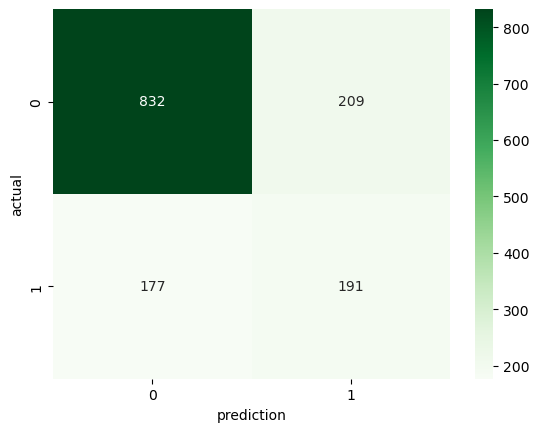

In [80]:
sns.heatmap(confusion_matrix(y_test,y_pred_dtree), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [81]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6591266236478303



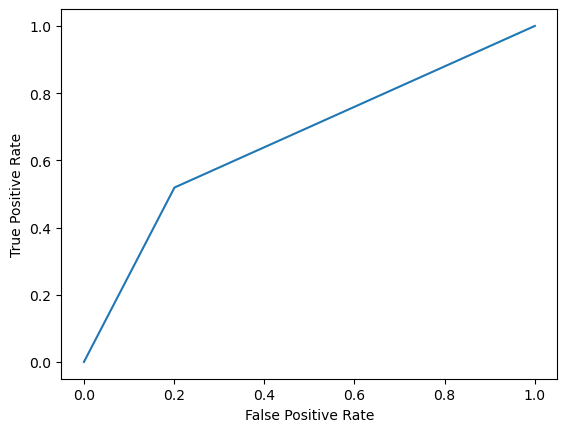

In [82]:
#plot roc auc
plot_roc_curve(y_test,y_pred_dtree,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_dtree)}\n')
plt.show()

In [83]:
# Check overfit on Model
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
cv = KFold(n_splits = 5, shuffle= True)

DT_kfold = cross_val_score(DTree, X_train, y_train, cv = cv)
DT_ts_kfold = cross_val_score(DTree, X_test, y_test, cv = cv)

pd.DataFrame({'LR Train kfold' : DT_kfold.tolist(),
             'LR Test kfold' : DT_ts_kfold.tolist(),})

,LR Train kfold,LR Test kfold
0,0.747116,0.691489
1,0.729370,0.769504
2,0.739130,0.702128
3,0.747116,0.687943
4,0.731794,0.740214


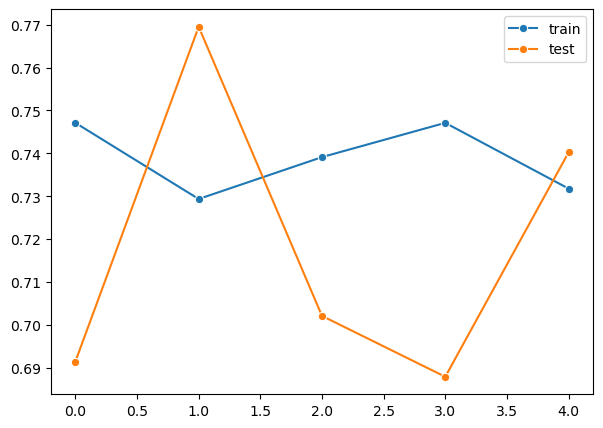

In [84]:
# plot trains vs test default
plt.figure(figsize=(7,5))
sns.lineplot(data = DT_kfold, label="train", marker="o")
sns.lineplot(data = DT_ts_kfold, label="test", marker="o")
plt.show()

In [85]:
# cek train score (mean)
DT_kfold.mean()

0.7389053760356563

In [86]:
# cek test score (mean)
DT_ts_kfold.mean()

0.7182554705837814

In [87]:
# score mean differences (<(0 - 10) = goodfit = acceptable)
round((DT_kfold.mean() - DT_ts_kfold.mean())*100, 2)

2.06

### SMOTE Data

In [88]:
# Decision Tree with default parameter
DTree = DecisionTreeClassifier()

In [89]:
DTree.fit(X_train_st, y_train_st)
DTree.score(X_test,y_test)
y_pred_dtree_st = DTree.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_dtree_st))
print(classification_report(y_test,y_pred_dtree_st))

0.709013484740951
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1041
           1       0.45      0.55      0.50       368

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



In [91]:
print(confusion_matrix(y_test,y_pred_dtree_st))

[[798 243]
 [167 201]]


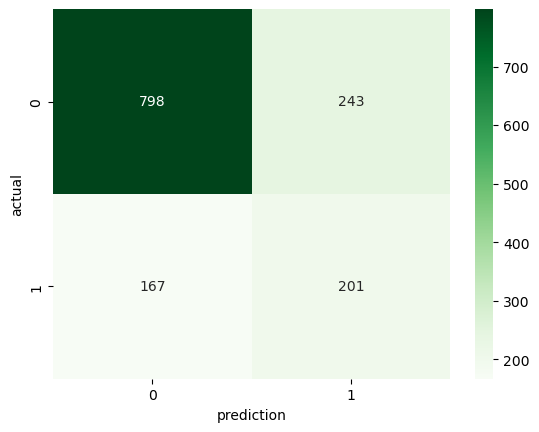

In [92]:
sns.heatmap(confusion_matrix(y_test,y_pred_dtree_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [93]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6563831286806165



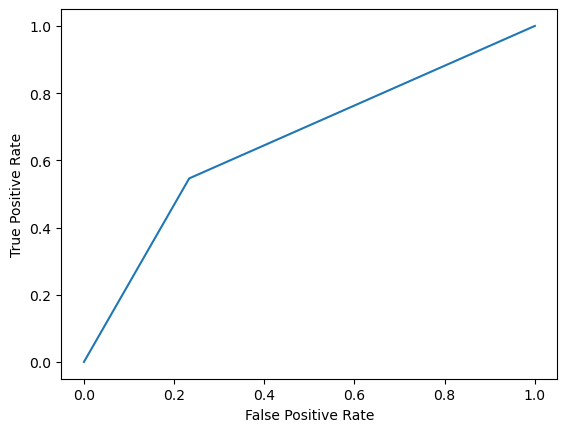

In [94]:
#plot roc auc
plot_roc_curve(y_test,y_pred_dtree_st,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_dtree_st)}\n')
plt.show()

In [95]:
# Check overfit on Decision Tree Classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
cv = KFold(n_splits = 5, shuffle= True)

DT_kfold = cross_val_score(DTree, X_train_st, y_train_st, cv = cv)
DT_ts_kfold = cross_val_score(DTree, X_test, y_test, cv = cv)

pd.DataFrame({'LR Train kfold' : DT_kfold.tolist(),
             'LR Test kfold' : DT_ts_kfold.tolist(),})

,LR Train kfold,LR Test kfold
0,0.780532,0.702128
1,0.766485,0.719858
2,0.788869,0.673759
3,0.763460,0.705674
4,0.781609,0.647687


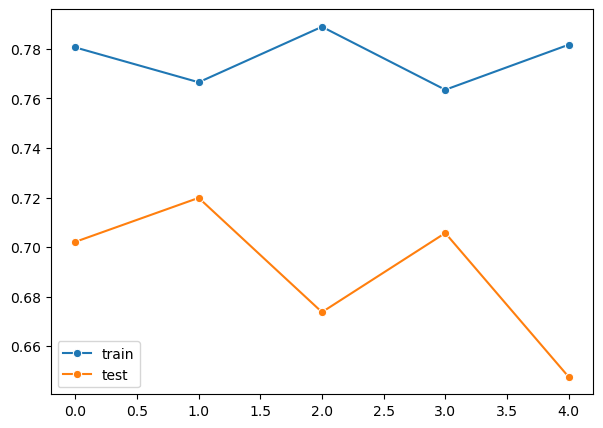

In [96]:
# plot trains vs test default
plt.figure(figsize=(7,5))
sns.lineplot(data = DT_kfold, label="train", marker="o")
sns.lineplot(data = DT_ts_kfold, label="test", marker="o")
plt.show()

In [97]:
# cek train score (mean)
DT_kfold.mean()

0.7761911032010247

In [98]:
# cek test score (mean)
DT_ts_kfold.mean()

0.6898210544913052

In [99]:
# score mean differences (<5 = bagus / goodfit = acceptable)
round((DT_kfold.mean() - DT_ts_kfold.mean())*100, 2)

8.64

### Nearmiss Data

In [100]:
# Decision Tree with default parameter
DTree = DecisionTreeClassifier()

In [101]:
DTree.fit(X_train_nm, y_train_nm)
DTree.score(X_test,y_test)
y_pred_dtree_nm = DTree.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_dtree_nm))
print(classification_report(y_test,y_pred_dtree_nm))

0.4918381831085876
              precision    recall  f1-score   support

           0       0.78      0.43      0.56      1041
           1       0.29      0.66      0.40       368

    accuracy                           0.49      1409
   macro avg       0.54      0.55      0.48      1409
weighted avg       0.65      0.49      0.52      1409



In [103]:
print(confusion_matrix(y_test,y_pred_dtree_nm))

[[451 590]
 [126 242]]


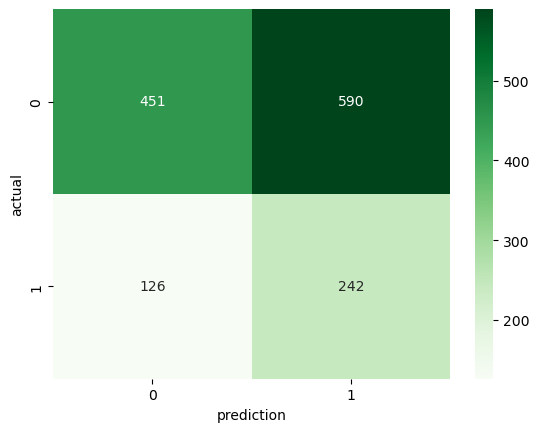

In [104]:
sns.heatmap(confusion_matrix(y_test,y_pred_dtree_nm), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [105]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.5454229837530802



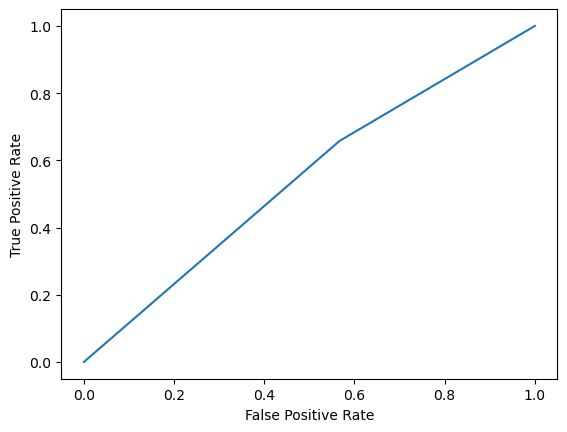

In [106]:
#plot roc auc
plot_roc_curve(y_test,y_pred_dtree_nm,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_dtree_nm)}\n')
plt.show()

In [107]:
# Check overfit on Decision Tree Classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
cv = KFold(n_splits = 5, shuffle= True)

DT_kfold = cross_val_score(DTree, X_train_nm, y_train_nm, cv = cv)
DT_ts_kfold = cross_val_score(DTree, X_test, y_test, cv = cv)

pd.DataFrame({'LR Train kfold' : DT_kfold.tolist(),
             'LR Test kfold' : DT_ts_kfold.tolist(),})

,LR Train kfold,LR Test kfold
0,0.622296,0.712766
1,0.613977,0.695035
2,0.611667,0.705674
3,0.636667,0.695035
4,0.641667,0.733096


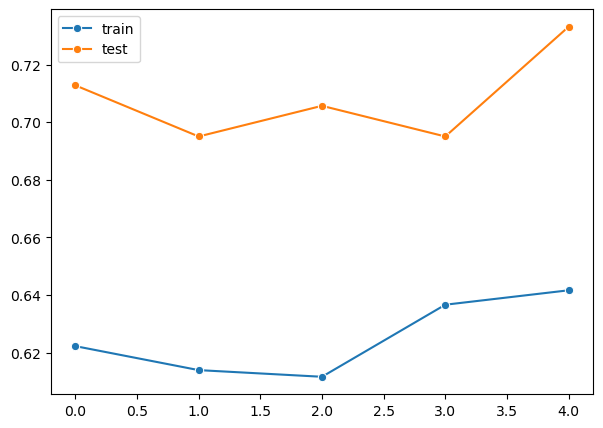

In [108]:
# plot trains vs test default
plt.figure(figsize=(7,5))
sns.lineplot(data = DT_kfold, label="train", marker="o")
sns.lineplot(data = DT_ts_kfold, label="test", marker="o")
plt.show()

In [109]:
# cek train score (mean)
DT_kfold.mean()

0.6252545757071547

In [110]:
# cek test score (mean)
DT_ts_kfold.mean()

0.708321344741425

In [111]:
# score mean differences (<5 = bagus / goodfit = acceptable)
round((DT_kfold.mean() - DT_ts_kfold.mean())*100, 2)

-8.31

### SMOTETomek Data

In [112]:
# Decision Tree with default parameter
DTree = DecisionTreeClassifier()

In [113]:
DTree.fit(X_train_smotetomek, y_train_smotetomek)
DTree.score(X_test,y_test)
y_pred_dtree_smotetomek = DTree.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_dtree_smotetomek))
print(classification_report(y_test,y_pred_dtree_smotetomek))

0.49964513839602553
              precision    recall  f1-score   support

           0       0.79      0.44      0.57      1041
           1       0.30      0.67      0.41       368

    accuracy                           0.50      1409
   macro avg       0.54      0.55      0.49      1409
weighted avg       0.66      0.50      0.52      1409



In [115]:
print(confusion_matrix(y_test,y_pred_dtree_smotetomek))

[[458 583]
 [122 246]]


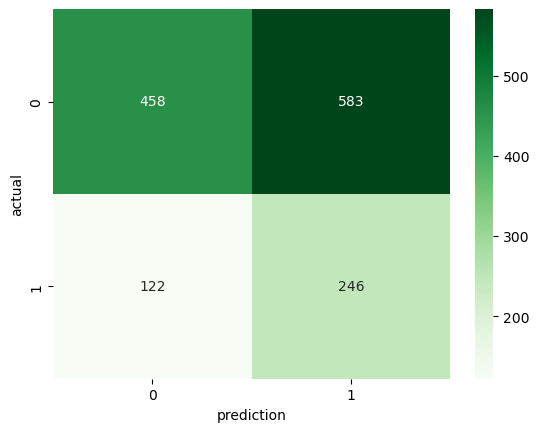

In [116]:
sns.heatmap(confusion_matrix(y_test,y_pred_dtree_smotetomek), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [117]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.5454229837530802



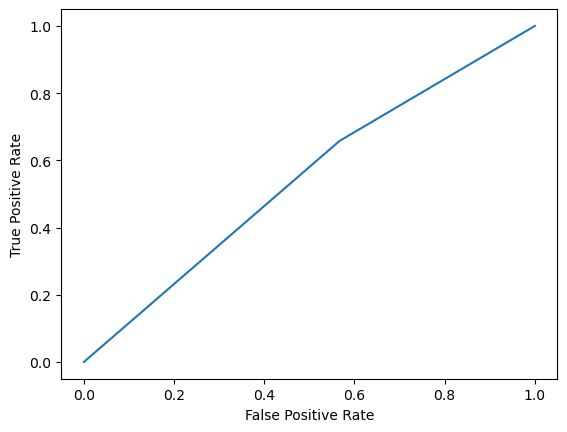

In [118]:
#plot roc auc
plot_roc_curve(y_test,y_pred_dtree_nm,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_dtree_nm)}\n')
plt.show()

In [119]:
# Check overfit on Decision Tree Classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
cv = KFold(n_splits = 5, shuffle= True)

DT_kfold = cross_val_score(DTree, X_train_smotetomek, y_train_smotetomek, cv = cv)
DT_ts_kfold = cross_val_score(DTree, X_test, y_test, cv = cv)

pd.DataFrame({'LR Train kfold' : DT_kfold.tolist(),
             'LR Test kfold' : DT_ts_kfold.tolist(),})

,LR Train kfold,LR Test kfold
0,0.628952,0.716312
1,0.638935,0.698582
2,0.628333,0.684397
3,0.596667,0.726950
4,0.620000,0.704626


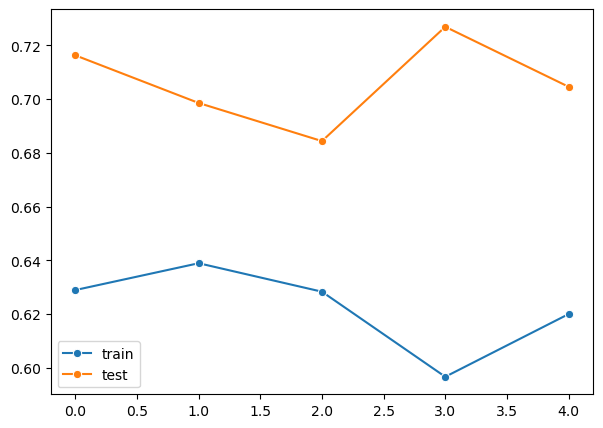

In [120]:
# plot trains vs test default
plt.figure(figsize=(7,5))
sns.lineplot(data = DT_kfold, label="train", marker="o")
sns.lineplot(data = DT_ts_kfold, label="test", marker="o")
plt.show()

In [121]:
# cek train score (mean)
DT_kfold.mean()

0.622577371048253

In [122]:
# cek test score (mean)
DT_ts_kfold.mean()

0.7061734938542692

In [123]:
# score mean differences (<5 = bagus / goodfit = acceptable)
round((DT_kfold.mean() - DT_ts_kfold.mean())*100, 2)

-8.36

## RandomForest

### Normal Data

In [124]:
# Random Forest Classifier with default parameter
RFC = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [125]:
RFC.fit(X_train, y_train)
RFC.score(X_test ,y_test)
y_pred_rfc = RFC.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

0.7877927608232789
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1041
           1       0.63      0.45      0.52       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409



In [127]:
print(confusion_matrix(y_test,y_pred_rfc))

[[946  95]
 [204 164]]


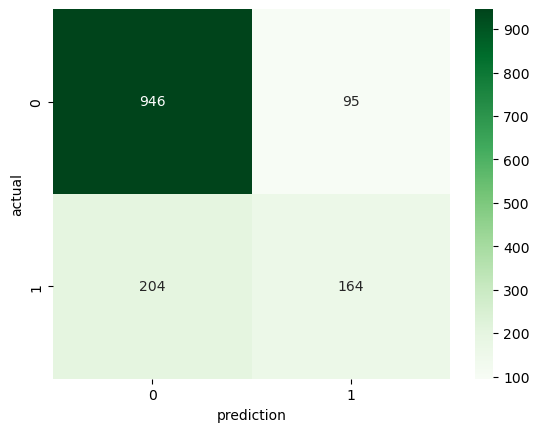

In [128]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [129]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6771968842668004



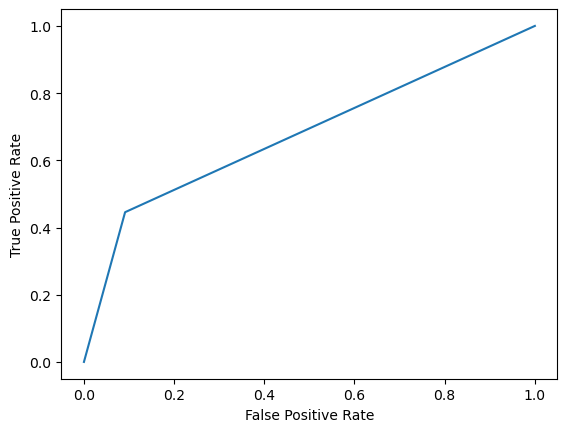

In [130]:
#plot roc auc
plot_roc_curve(y_test,y_pred_rfc,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_rfc)}\n')
plt.show()

In [131]:
# Check overfit on Decision Tree Classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
cv = KFold(n_splits = 5, shuffle= True)

DT_kfold = cross_val_score(RFC, X_train, y_train, cv = cv)
DT_ts_kfold = cross_val_score(RFC, X_test, y_test, cv = cv)

pd.DataFrame({'LR Train kfold' : DT_kfold.tolist(),
             'LR Test kfold' : DT_ts_kfold.tolist(),})

,LR Train kfold,LR Test kfold
0,0.815439,0.765957
1,0.812777,0.801418
2,0.792369,0.790780
3,0.788820,0.773050
4,0.796625,0.793594


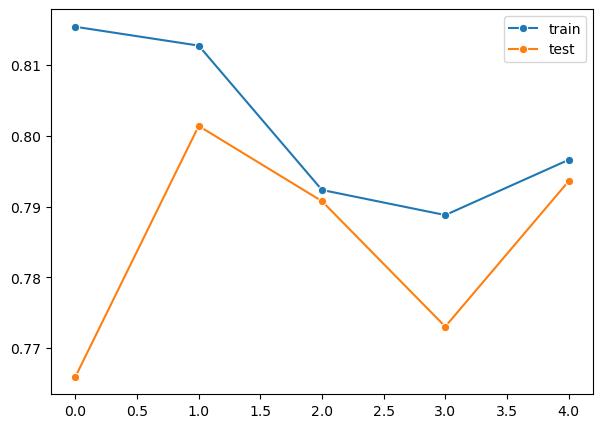

In [132]:
# plot trains vs test default
plt.figure(figsize=(7,5))
sns.lineplot(data = DT_kfold, label="train", marker="o")
sns.lineplot(data = DT_ts_kfold, label="test", marker="o")
plt.show()

In [133]:
# cek train score (mean)
DT_kfold.mean()

0.8012061446711668

In [134]:
# cek test score (mean)
DT_ts_kfold.mean()

0.7849599959617375

In [135]:
# score mean differences (<5 = bagus / goodfit = acceptable)
round((DT_kfold.mean() - DT_ts_kfold.mean())*100, 2)

1.62

### SMOTE Data

In [136]:
# Random Forest Classifier with default parameter
RFC = RandomForestClassifier(n_estimators = 1000,
                            max_depth = 100,
                            min_weight_fraction_leaf = 0.01,
                            n_jobs = 100)

In [137]:
RFC.fit(X_train_st, y_train_st)
RFC.score(X_test ,y_test)
y_pred_rfc_st = RFC.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_rfc_st))
print(classification_report(y_test,y_pred_rfc_st))

0.7459190915542938
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1041
           1       0.51      0.75      0.61       368

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [139]:
print(confusion_matrix(y_test,y_pred_rfc_st))

[[775 266]
 [ 92 276]]


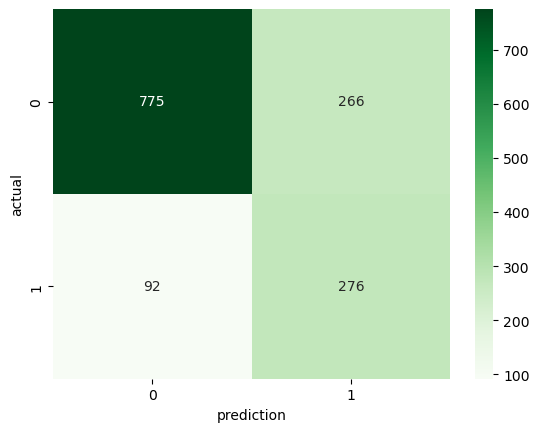

In [140]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [141]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.74723823246878



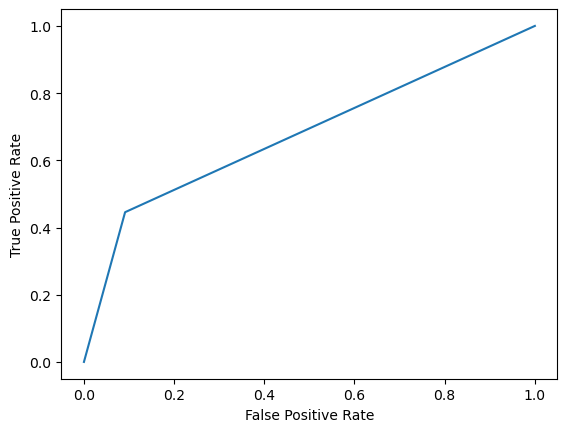

In [142]:
#plot roc auc
plot_roc_curve(y_test,y_pred_rfc,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_rfc_st)}\n')
plt.show()

### Nearmiss Data

In [143]:
# Random Forest Classifier with default parameter
RFC = RandomForestClassifier(n_estimators = 1000,
                            max_depth = 100,
                            min_weight_fraction_leaf = 0.01,
                            n_jobs = 100)

In [144]:
RFC.fit(X_train_nm, y_train_nm)
RFC.score(X_test ,y_test)
y_pred_rfc_nm = RFC.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_rfc_nm))
print(classification_report(y_test,y_pred_rfc_nm))

0.5010645848119234
              precision    recall  f1-score   support

           0       0.87      0.38      0.53      1041
           1       0.32      0.85      0.47       368

    accuracy                           0.50      1409
   macro avg       0.60      0.61      0.50      1409
weighted avg       0.73      0.50      0.51      1409



In [146]:
print(confusion_matrix(y_test,y_pred_rfc_nm))

[[395 646]
 [ 57 311]]


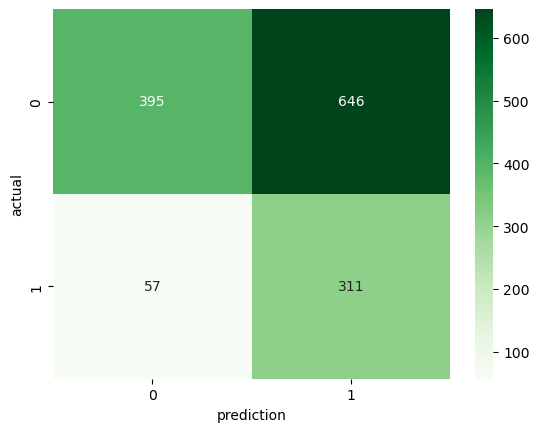

In [147]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc_nm), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [148]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6122757695359813



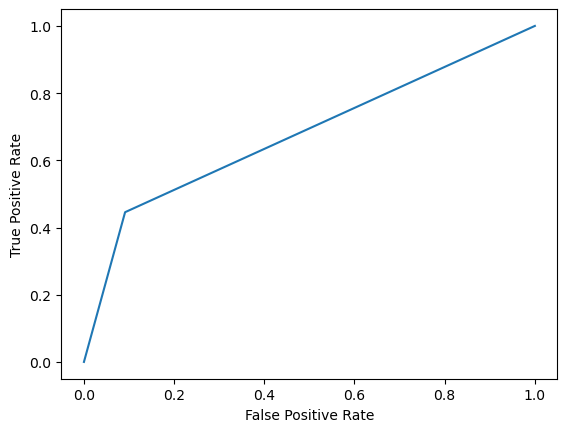

In [149]:
#plot roc auc
plot_roc_curve(y_test,y_pred_rfc,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_rfc_nm)}\n')
plt.show()

### SMOTETomek Data

In [150]:
# Random Forest Classifier with default parameter
RFC = RandomForestClassifier(n_estimators = 1000,
                            max_depth = 100,
                            min_weight_fraction_leaf = 0.01,
                            n_jobs = 100)

In [151]:
RFC.fit(X_train_smotetomek, y_train_smotetomek)
RFC.score(X_test ,y_test)
y_pred_rfc_smotetomek = RFC.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_rfc_smotetomek))
print(classification_report(y_test,y_pred_rfc_smotetomek))

0.5031937544357701
              precision    recall  f1-score   support

           0       0.87      0.38      0.53      1041
           1       0.33      0.85      0.47       368

    accuracy                           0.50      1409
   macro avg       0.60      0.61      0.50      1409
weighted avg       0.73      0.50      0.52      1409



In [153]:
print(confusion_matrix(y_test,y_pred_rfc_smotetomek))

[[398 643]
 [ 57 311]]


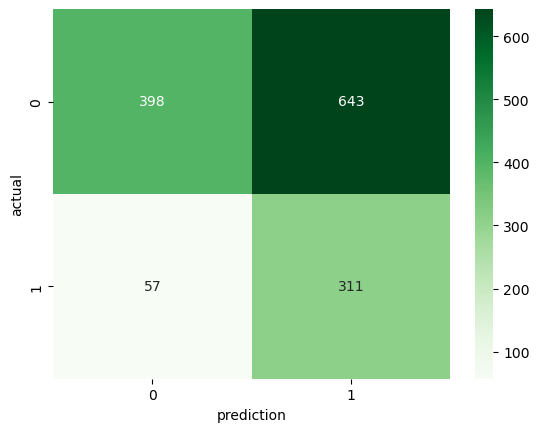

In [154]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc_smotetomek), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [155]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.613716691726183



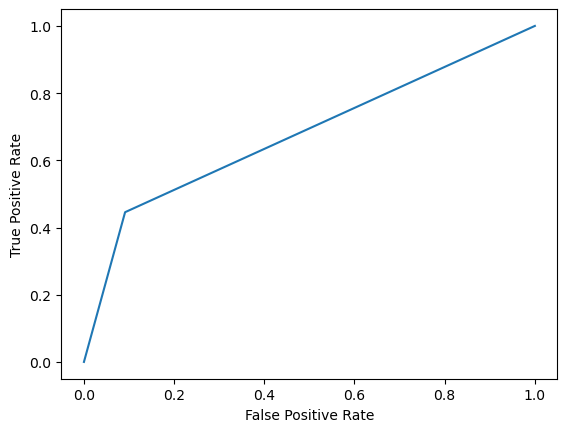

In [156]:
#plot roc auc
plot_roc_curve(y_test,y_pred_rfc,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_rfc_smotetomek)}\n')
plt.show()

## XGBoost

### Normal Data

In [157]:
# XGBoost Classifier with default parameter
XGB = XGBClassifier(max_depth=1,
                        learning_rate=0.1, 
                        n_estimators=5, 
                        subsample=0.1, 
                        min_child_weight=1,
                        random_state=10,
                        reg_alpha = 1,
                        reg_lambda = 0)

In [158]:
XGB.fit(X_train, y_train)
XGB.score(X_test ,y_test)
y_pred_xgb = XGB.predict(X_test)

[16:37:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1041
           1       0.72      0.16      0.26       368

    accuracy                           0.76      1409
   macro avg       0.74      0.57      0.56      1409
weighted avg       0.75      0.76      0.70      1409



In [160]:
print(confusion_matrix(y_test,y_pred_xgb))

[[1018   23]
 [ 310   58]]


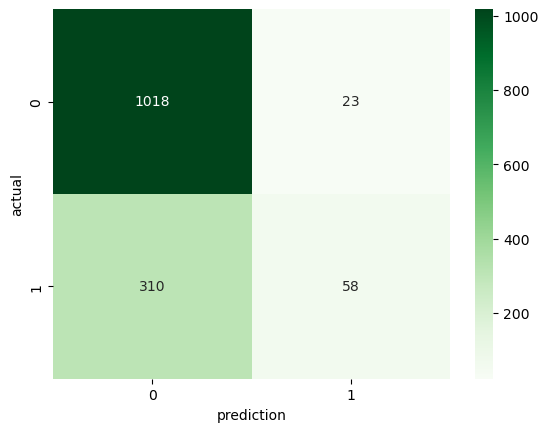

In [161]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [162]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.567757277701207



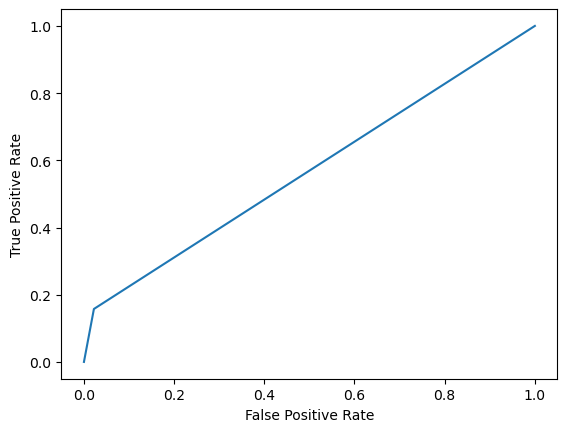

In [163]:
#plot roc auc
plot_roc_curve(y_test,y_pred_xgb,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_xgb)}\n')
plt.show()

### SMOTE Data

In [164]:
# XGBoost Classifier with default parameter
XGB = XGBClassifier(max_depth=1,
                        learning_rate=0.1, 
                        n_estimators=5, 
                        subsample=0.1, 
                        min_child_weight=10,
                        random_state=10,
                        reg_alpha = 1,
                        reg_lambda = 0)

In [165]:
XGB.fit(X_train_st, y_train_st)
XGB.score(X_test ,y_test)
y_pred_xgb_st = XGB.predict(X_test)

[16:37:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
print(classification_report(y_test,y_pred_xgb_st))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1041
           1       0.41      0.85      0.56       368

    accuracy                           0.64      1409
   macro avg       0.66      0.71      0.63      1409
weighted avg       0.78      0.64      0.66      1409



In [167]:
print(confusion_matrix(y_test,y_pred_xgb_st))

[[593 448]
 [ 54 314]]


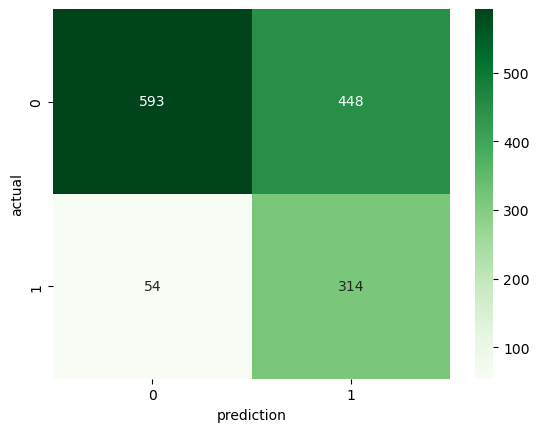

In [168]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [169]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.7114527210458172



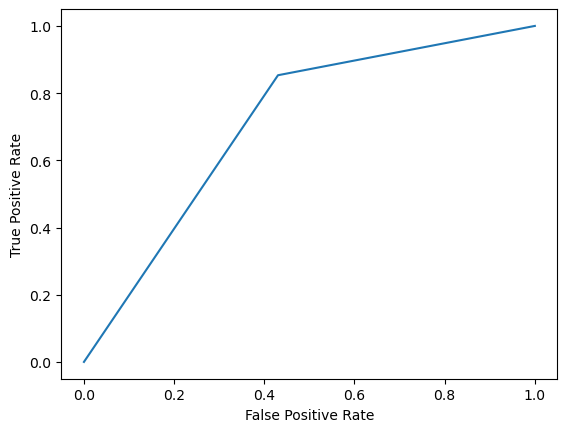

In [170]:
#plot roc auc
plot_roc_curve(y_test,y_pred_xgb_st,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_xgb_st)}\n')
plt.show()

### Nearmiss Data

In [171]:
# XGBoost Classifier with default parameter
XGB = XGBClassifier(max_depth=1,
                        learning_rate=0.1, 
                        n_estimators=5, 
                        subsample=0.1, 
                        min_child_weight=10,
                        random_state=10,
                        reg_alpha = 1,
                        reg_lambda = 0)

In [172]:
XGB.fit(X_train_nm, y_train_nm)
XGB.score(X_test ,y_test)
y_pred_xgb_nm = XGB.predict(X_test)

[16:37:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [173]:
print(classification_report(y_test,y_pred_xgb_nm))

              precision    recall  f1-score   support

           0       0.92      0.28      0.43      1041
           1       0.31      0.93      0.47       368

    accuracy                           0.45      1409
   macro avg       0.61      0.61      0.45      1409
weighted avg       0.76      0.45      0.44      1409



In [174]:
print(confusion_matrix(y_test,y_pred_xgb_nm))

[[295 746]
 [ 27 341]]


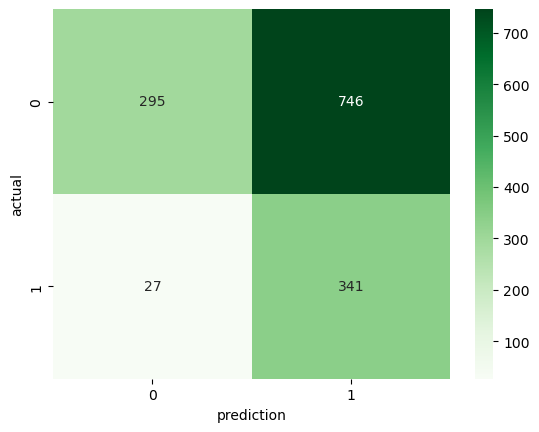

In [175]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb_nm), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [176]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6050058994278077



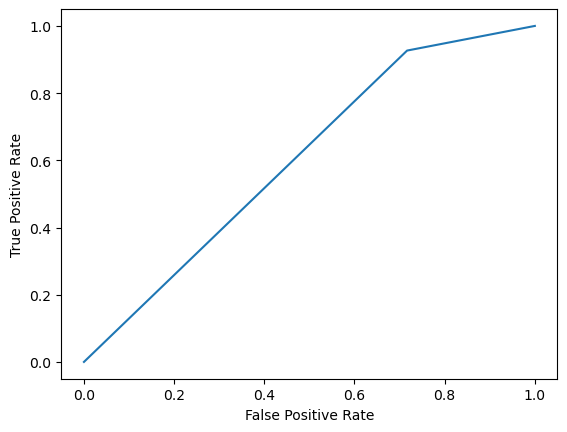

In [177]:
#plot roc auc
plot_roc_curve(y_test,y_pred_xgb_nm,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_xgb_nm)}\n')
plt.show()

### SMOTETomek Data

In [178]:
# XGBoost Classifier with default parameter
XGB = XGBClassifier(max_depth=1,
                        learning_rate=0.1, 
                        n_estimators=5, 
                        subsample=0.1, 
                        min_child_weight=10,
                        random_state=10,
                        reg_alpha = 1,
                        reg_lambda = 0)

In [179]:
XGB.fit(X_train_smotetomek, y_train_smotetomek)
XGB.score(X_test ,y_test)
y_pred_xgb_smotetomek = XGB.predict(X_test)

[16:37:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [180]:
print(classification_report(y_test,y_pred_xgb_smotetomek))

              precision    recall  f1-score   support

           0       0.92      0.28      0.43      1041
           1       0.31      0.93      0.47       368

    accuracy                           0.45      1409
   macro avg       0.61      0.61      0.45      1409
weighted avg       0.76      0.45      0.44      1409



In [181]:
print(confusion_matrix(y_test,y_pred_xgb_smotetomek))

[[295 746]
 [ 27 341]]


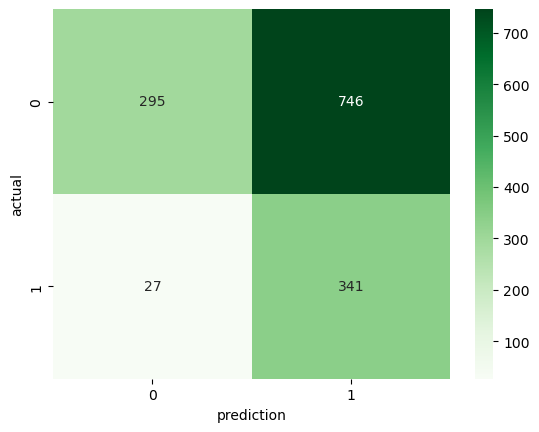

In [182]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb_smotetomek), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [183]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6050058994278077



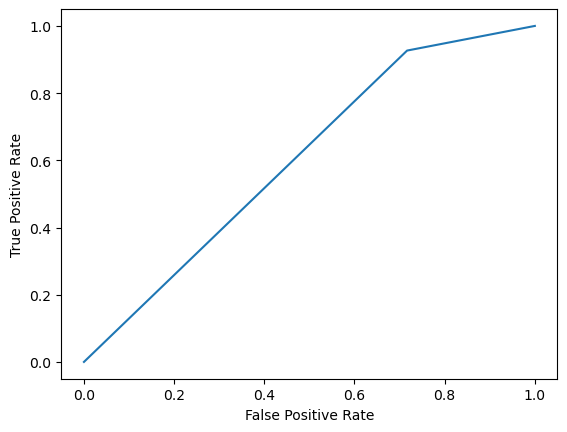

In [184]:
#plot roc auc
plot_roc_curve(y_test,y_pred_xgb_smotetomek,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_xgb_smotetomek)}\n')
plt.show()

## ADABoost

### Normal Data

In [185]:
# ADABoost Classifier with default parameter
ADA = AdaBoostClassifier(learning_rate=1, 
                        n_estimators=100,
                        random_state=100)

In [186]:
ADA.fit(X_train, y_train)
ADA.score(X_test ,y_test)
y_pred_ada = ADA.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))

0.7877927608232789
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.61      0.52      0.56       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [188]:
print(confusion_matrix(y_test,y_pred_ada))

[[919 122]
 [177 191]]


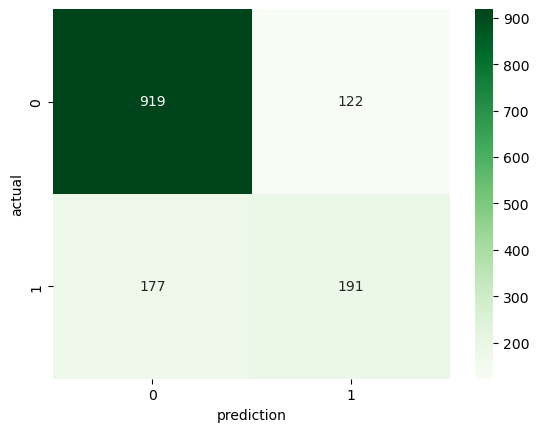

In [189]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [190]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.7009133671636804



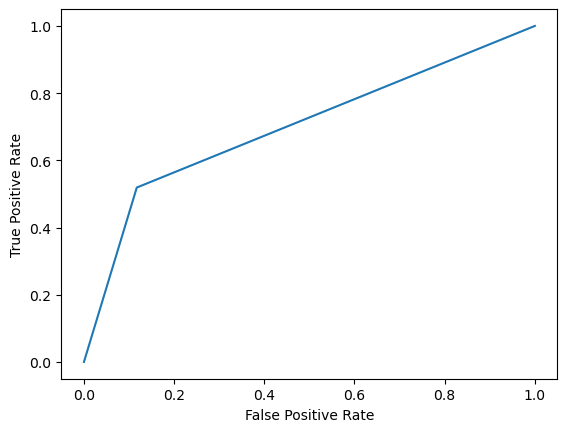

In [191]:
#plot roc auc
plot_roc_curve(y_test,y_pred_ada,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_ada)}\n')
plt.show()

### SMOTE Data

In [192]:
# ADABoost Classifier with default parameter
ADA = AdaBoostClassifier(learning_rate=1, 
                        n_estimators=100,
                        random_state=100)

In [193]:
ADA.fit(X_train_st, y_train_st)
ADA.score(X_test ,y_test)
y_pred_ada_st = ADA.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_ada_st))
print(classification_report(y_test,y_pred_ada_st))

0.7558552164655784
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1041
           1       0.52      0.71      0.60       368

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.76      0.77      1409



In [195]:
print(confusion_matrix(y_test,y_pred_ada_st))

[[804 237]
 [107 261]]


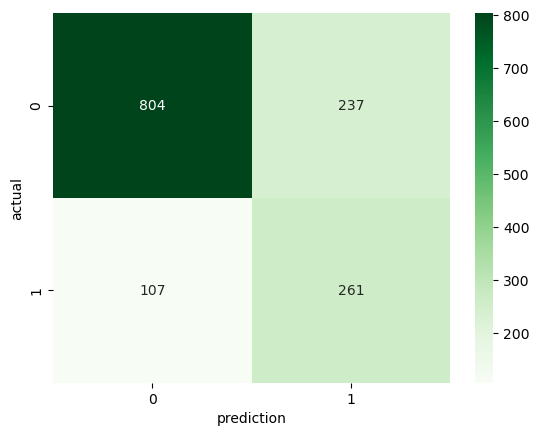

In [196]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [197]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.7407867121914548



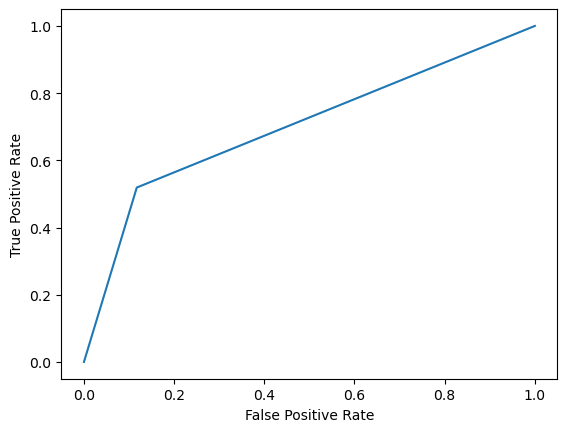

In [198]:
#plot roc auc
plot_roc_curve(y_test,y_pred_ada,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_ada_st)}\n')
plt.show()

### Nearmiss Data

In [199]:
# ADABoost Classifier with default parameter
ADA = AdaBoostClassifier(learning_rate=1, 
                        n_estimators=100,
                        random_state=100)

In [201]:
ADA.fit(X_train_nm, y_train_nm)
ADA.score(X_test ,y_test)
y_pred_ada_nm = ADA.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_ada_nm))
print(classification_report(y_test,y_pred_ada_nm))

0.525195173882186
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1041
           1       0.33      0.77      0.46       368

    accuracy                           0.53      1409
   macro avg       0.58      0.60      0.52      1409
weighted avg       0.71      0.53      0.55      1409



In [203]:
print(confusion_matrix(y_test,y_pred_ada_nm))

[[458 583]
 [ 86 282]]


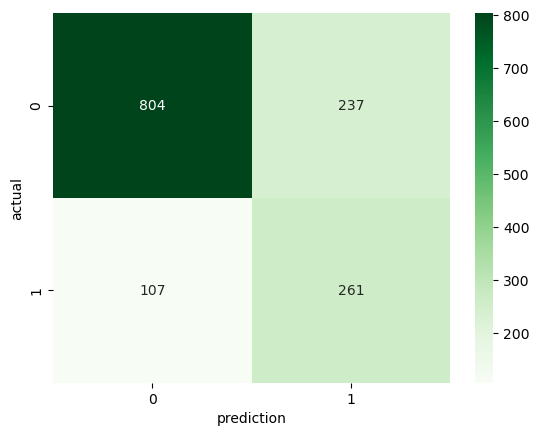

In [204]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [205]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6031329616171741



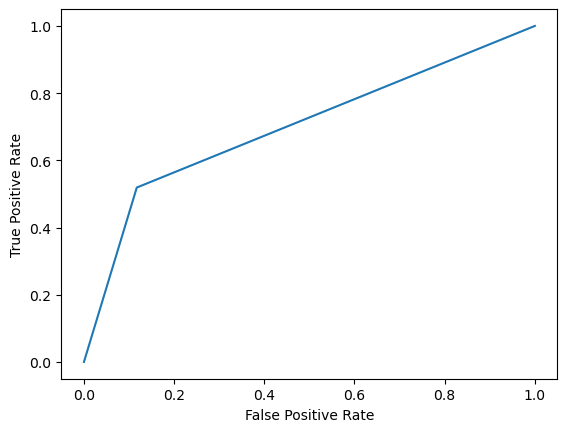

In [206]:
#plot roc auc
plot_roc_curve(y_test,y_pred_ada,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_ada_nm)}\n')
plt.show()

### SMOTETomek Data

In [207]:
# ADABoost Classifier with default parameter
ADA = AdaBoostClassifier(learning_rate=1, 
                        n_estimators=100,
                        random_state=100)

In [208]:
ADA.fit(X_train_smotetomek, y_train_smotetomek)
ADA.score(X_test ,y_test)
y_pred_ada_smotetomek = ADA.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred_ada_smotetomek))
print(classification_report(y_test,y_pred_ada_smotetomek))

0.525195173882186
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1041
           1       0.33      0.77      0.46       368

    accuracy                           0.53      1409
   macro avg       0.58      0.60      0.52      1409
weighted avg       0.71      0.53      0.55      1409



In [210]:
print(confusion_matrix(y_test,y_pred_ada_smotetomek))

[[458 583]
 [ 86 282]]


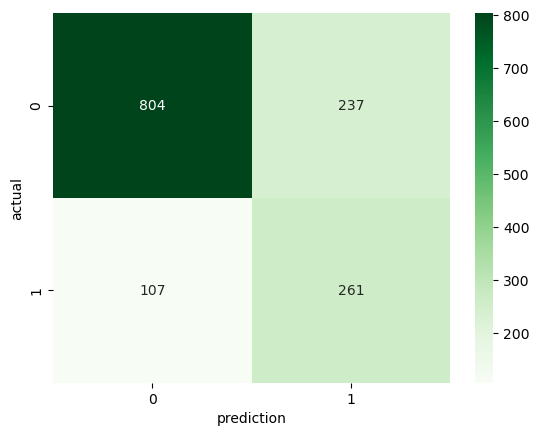

In [211]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_st), annot=True, fmt='.0f', cmap="Greens")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [212]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    plt.plot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 0.6031329616171741



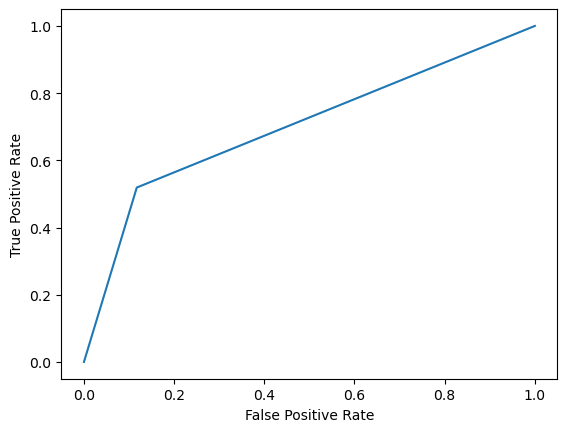

In [213]:
#plot roc auc
plot_roc_curve(y_test,y_pred_ada,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_ada_smotetomek)}\n')
plt.show()

## Stacking

In [214]:
from sklearn.ensemble import StackingClassifier

level1 = list()
level1.append(('ada', AdaBoostClassifier(learning_rate=1, 
                        n_estimators=100,
                        random_state=100)))
level1.append(('rfc', RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                             random_state =50, max_features = "auto",
                                             max_leaf_nodes = 30)))
level1.append(('xgboost', XGBClassifier(max_depth=1,
                                        learning_rate=0.1, 
                                        n_estimators=10, 
                                        subsample=0.1, 
                                        min_child_weight=1,
                                        random_state=10,
                                        reg_alpha = 0,
                                        reg_lambda = 1)))

# definisikan model level 2
level2 = XGBClassifier(max_depth=1,
                        learning_rate=0.1, 
                        n_estimators=10, 
                        subsample=0.1, 
                        min_child_weight=1,
                        random_state=10,
                        reg_alpha = 0,
                        reg_lambda = 1)

# define the stacking ensemble
stacking = StackingClassifier(estimators=level1, final_estimator=level2, cv=50)

# fit the model on all available data
stacking.fit(X_train, y_train)

[16:38:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:36] WARNING:

StackingClassifier(cv=50,
                   estimators=[('ada',
                                AdaBoostClassifier(learning_rate=1,
                                                   n_estimators=100,
                                                   random_state=100)),
                               ('rfc',
                                RandomForestClassifier(max_features='auto',
                                                       max_leaf_nodes=30,
                                                       n_estimators=1000,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=50)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsamp...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_delta_step=None,
                                                 max_depth=1,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=10, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=10, reg_alpha=0,
                                                 reg_lambda=1,
                                                 scale_pos_weight=None,
                                                 subsample=0.1,
                                                 tree_method=None,
                                                 validate_parameters=None,
                                                 verbosity=None))

In [215]:
y_pred_stacking = stacking.predict(X_test)

In [216]:
print(classification_report(y_test,y_pred_stacking))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1041
           1       0.61      0.55      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



# Conclusion

In [217]:
# Create a dictionary 
eval = {"Model" : ["DecisionTree Normal Data", "DecisionTree SMOTE Data", "DecisionTree NearMiss Data", "RandomForest Normal Data", "RandomForest SMOTE Data",
                   "RandomForest NearMiss Data", "XGboost Normal Data","XGboost SMOTE Data","XGboost NearMiss Data","AdaBoost Normal Data","AdaBoost SMOTE Data",
                   "AdaBoost NearMiss Data", "Stacking"],
        "Precision" : [str(precision_score(y_test, y_pred_dtree)), str(precision_score(y_test, y_pred_dtree_st)), str(precision_score(y_test, y_pred_dtree_nm)),
                       str(precision_score(y_test, y_pred_rfc)), str(precision_score(y_test, y_pred_rfc_st)), str(precision_score(y_test, y_pred_rfc_nm)),
                       str(precision_score(y_test, y_pred_xgb)), str(precision_score(y_test, y_pred_xgb_st)), str(precision_score(y_test, y_pred_xgb_nm)),
                       str(precision_score(y_test, y_pred_ada)), str(precision_score(y_test, y_pred_ada_st)), str(precision_score(y_test, y_pred_ada_nm)),
                       str(precision_score(y_test, y_pred_stacking))],
        "Recall"    : [str(recall_score(y_test, y_pred_dtree)), str(recall_score(y_test, y_pred_dtree_st)), str(recall_score(y_test, y_pred_dtree_nm)),
                       str(recall_score(y_test, y_pred_rfc)), str(recall_score(y_test, y_pred_rfc_st)), str(recall_score(y_test, y_pred_rfc_nm)),
                       str(recall_score(y_test, y_pred_xgb)), str(recall_score(y_test, y_pred_xgb_st)), str(recall_score(y_test, y_pred_xgb_nm)),
                       str(recall_score(y_test, y_pred_ada)), str(recall_score(y_test, y_pred_ada_st)), str(recall_score(y_test, y_pred_ada_nm)),
                       str(recall_score(y_test, y_pred_stacking))],
        "Accuracy"  : [str(accuracy_score(y_test, y_pred_dtree)), str(accuracy_score(y_test, y_pred_dtree_st)), str(accuracy_score(y_test, y_pred_dtree_nm)),
                       str(accuracy_score(y_test, y_pred_rfc)), str(accuracy_score(y_test, y_pred_rfc_st)), str(accuracy_score(y_test, y_pred_rfc_nm)),
                       str(accuracy_score(y_test, y_pred_xgb)), str(accuracy_score(y_test, y_pred_xgb_st)), str(accuracy_score(y_test, y_pred_xgb_nm)),
                       str(accuracy_score(y_test, y_pred_ada)), str(accuracy_score(y_test, y_pred_ada_st)), str(accuracy_score(y_test, y_pred_ada_nm)),
                       str(accuracy_score(y_test, y_pred_stacking))]}

In [218]:
eval_score = pd.DataFrame(eval).sort_values(by = "Recall", ascending=False)

In [219]:
eval_score

,Model,Precision,Recall,Accuracy
8,XGboost NearMiss Data,0.3137074517019319,0.9266304347826086,0.45138396025550037
7,XGboost SMOTE Data,0.4120734908136483,0.8532608695652174,0.6437189496096523
5,RandomForest NearMiss Data,0.32497387669801464,0.845108695652174,0.5010645848119234
11,AdaBoost NearMiss Data,0.3260115606936416,0.7663043478260869,0.525195173882186
4,RandomForest SMOTE Data,0.5092250922509225,0.75,0.7459190915542938
10,AdaBoost SMOTE Data,0.5240963855421686,0.7092391304347826,0.7558552164655784
2,DecisionTree NearMiss Data,0.29086538461538464,0.657608695652174,0.4918381831085876
12,Stacking,0.6121212121212121,0.5489130434782609,0.7913413768630234
1,DecisionTree SMOTE Data,0.4527027027027027,0.5461956521739131,0.709013484740951
0,DecisionTree Normal Data,0.4775,0.5190217391304348,0.7260468417317246


> Berdasarkan tabel di atas, dapat dilihat bahwa Precision terbaik terdapat pada model XGBoost dengan Data yang tidak dilakukan balancing. Pada hal ini, saya memperhatikan Precision dikarenakan Precision lebih mengutamakan prediksi Churn, akan tetapi kenyataannya tidak Churn. Dengan begitu, kita dapat meminimalisir kerugian.